In [1]:
!gdown --id 17hm4OL74_zRcWT2kwwqJyrALCEIinPcM

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17hm4OL74_zRcWT2kwwqJyrALCEIinPcM
To: /content/Training Data.csv
100% 20.1M/20.1M [00:00<00:00, 47.8MB/s]


In [2]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
colors = ['teal', 'darkorange', 'darkblue','maroon']

In [5]:
df = pd.read_csv('Training Data.csv')
df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


# Business Understanding

1. Problem dari dataset
* Tingginya angka pinjaman
* Tingginya angka gagal bayar
* Staff yang terbatas

2. Sebagai siapa kalian pada dataset tersebut? Data scientist di DataTrust Consultant

3. Goal yang ingin dicapai
* Meningkatkan akurasi dalam persetujuan pinjaman
* Meningkatkan efisiensi dalam mengevaluasi pinjaman untuk mendukung staf yang terbatas

4. Objective yang sesuai dengan goal
* Mengembangkan model untuk memprediksi pinjaman yang beresiko
* Mengembangkan model untuk menghindari bias dan mendukung keputusan pemberian pinjaman yang akurat

5. Business metrics untuk mengukur ketercapaian Objective
* Approval Rate Optimization: Mengoptimalkan persetujuan pinjaman dan meminimalkan risiko
* Cost-to-Income Ratio: Banyak biaya yang dikeluarkan untuk menghasilkan pendapatan
* Non-Performing Loan (NPL) Reduction Rate: Mengurangi pinjaman beresiko
* Cycle Time Optimization: Meningkatkan efektivitas waktu proses loan assessment

# Exploratory Data Analysis

Penjelasan fitur:
1. **Id**: Identifikasi unik untuk setiap peminjam.  
2. **Income**: Pendapatan tahunan peminjam (nilai numerik dalam satuan mata uang).  
3. **Age**: Usia peminjam dalam tahun.  
4. **Experience**: Jumlah tahun pengalaman kerja profesional.  
5. **Married/Single**: Status pernikahan (Menikah atau Lajang).  
6. **House_Ownership**: Jenis kepemilikan rumah (Milik, Sewa, atau Tidak Sewa dan Tidak Milik).  
7. **Car_Ownership**: Apakah peminjam memiliki mobil (Ya atau Tidak).  
8. **Profession**: Pekerjaan atau profesi peminjam.  
9. **CITY**: Kota tempat tinggal peminjam.  
10. **STATE**: Provinsi tempat tinggal peminjam.  
11. **CURRENT_JOB_YRS**: Jumlah tahun bekerja di pekerjaan saat ini.  
12. **CURRENT_HOUSE_YRS**: Jumlah tahun tinggal di rumah saat ini.  
13. **Risk_Flag**: Variabel target ‚Äì bernilai **1** jika peminjam berisiko gagal bayar, dan **0** jika tergolong risiko rendah.

In [7]:
df['Id'] = df['Id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  object
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


In [8]:
cats= ['Id','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
nums=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

# General Info

In [9]:
df.describe()

Income            Age     Experience  CURRENT_JOB_YRS  \
count  2.520000e+05  252000.000000  252000.000000    252000.000000   
mean   4.997117e+06      49.954071      10.084437         6.333877   
std    2.878311e+06      17.063855       6.002590         3.647053   
min    1.031000e+04      21.000000       0.000000         0.000000   
25%    2.503015e+06      35.000000       5.000000         3.000000   
50%    5.000694e+06      50.000000      10.000000         6.000000   
75%    7.477502e+06      65.000000      15.000000         9.000000   
max    9.999938e+06      79.000000      20.000000        14.000000   

       CURRENT_HOUSE_YRS      Risk_Flag  
count      252000.000000  252000.000000  
mean           11.997794       0.123000  
std             1.399037       0.328438  
min            10.000000       0.000000  
25%            11.000000       0.000000  
50%            12.000000       0.000000  
75%            13.000000       0.000000  
max            14.000000       1.000000

In [10]:
df[cats].describe()

Id Married/Single House_Ownership Car_Ownership Profession  \
count   252000         252000          252000        252000     252000   
unique  252000              2               3             2         51   
top     251984         single          rented            no  Physician   
freq         1         226272          231898        176000       5957   

                 CITY          STATE  
count          252000         252000  
unique            317             29  
top     Vijayanagaram  Uttar_Pradesh  
freq             1259          28400

# Checking Empty and duplicated data

In [11]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

**Data Insight**

1. Kolom Id memiliki tipe data yang tidak tepat (Integer), sehingga diubah menjadi string
2. Total data dari dataset adalah 252.000 dan tidak ada data yang hilang atau duplikat

# Univariate Analysis

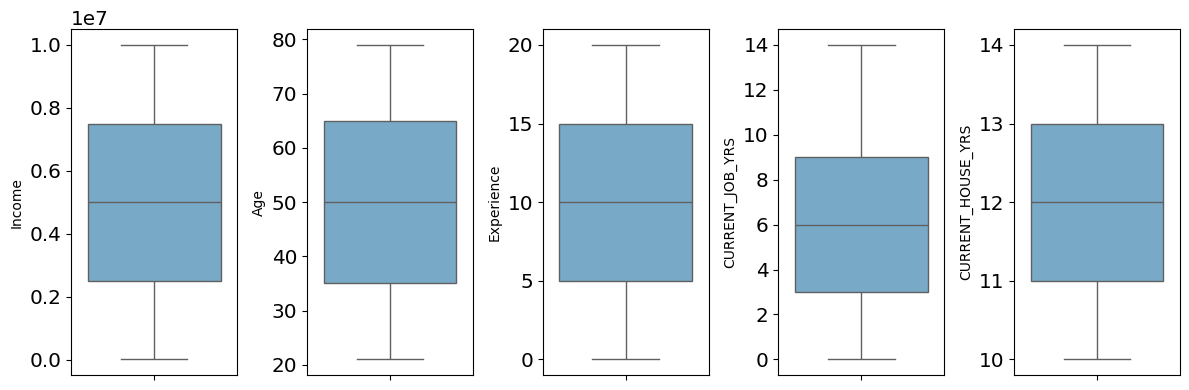

In [13]:
for i in range(0, len(nums[:-1])):
    plt.subplot(1, len(nums[:-1]), i+1)
    sns.boxplot(y=df[nums[:-1][i]], orient='v', palette='Blues')
    plt.tight_layout()

**Data Insight**

Kolom Income, Age, Experience, CURRENT_JOB_YRS, dan CURRENT_HOUSE_YRS tidak memiliki outlier. Ini menunjukkan data terdistribusi dengan baik tanpa nilai ekstrem

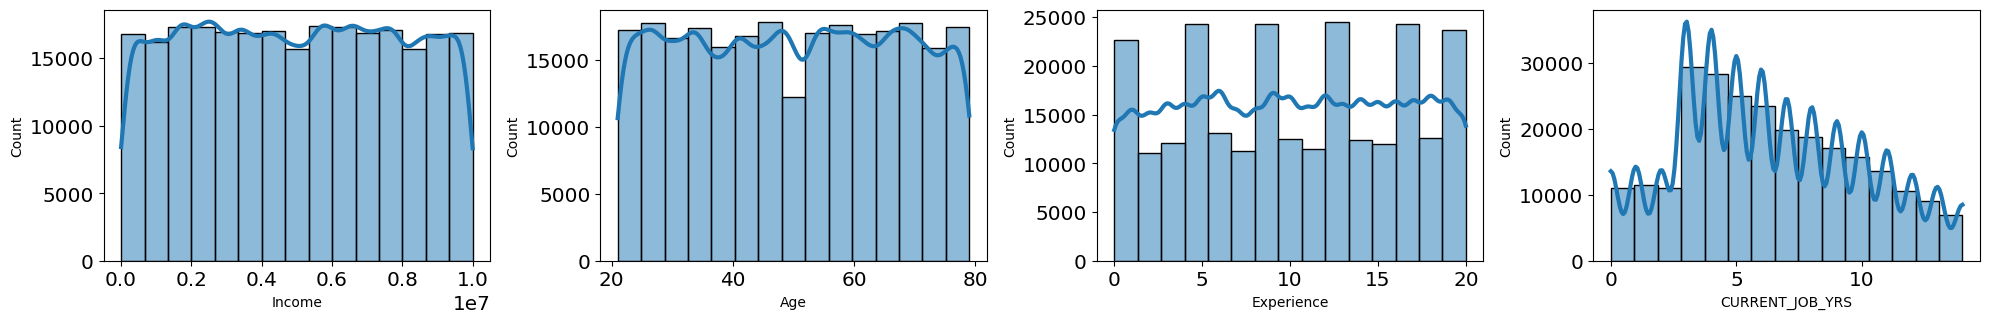

In [14]:
plt.figure(figsize=(20,6))
for i in range(0, len(nums[:-2])):
    plt.subplot(2, len(nums[:-2]), i+1)
    sns.histplot(df[nums[:-2][i]], bins=15, kde=True, palette='Blues')
    plt.tight_layout()

**Data Insight**
1. Kolom Income, Age, dan Experience memiliki distribusi normal
2. Kolom CURRENT_JOB_YRS memiliki distribusi positive skewness

<Axes: xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

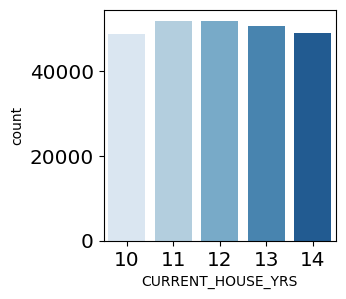

In [15]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['CURRENT_HOUSE_YRS'], palette='Blues')

**Data Insight**

Lebih dari 40.000 peminjam sudah tinggal di rumahnya saat ini untuk rentang 10-14 tahun, dimana jumlah peminjam untuk setiap kategori tahun cukup seimbang

In [16]:
def compute_distribution(df, col):

    """
    Utility function to check data distribution for numerical features.

    mean >  median : Positive (Right) Skewed
    mean <  median : Negative (Left) Skewed
    mean == median : Normal

    skew in range (-0.5, 0.5) = approximately symmetrical (Normal distribution)
    skew in range (-1, 1) = moderately skewed
    skew > 1 or skew < -1 = highly skewed

    kurtosis > 3 : Leptokurtic
    kurtosis == 3: Mesokurtic
    kurtosis < 3: Platykurtic

    :param df: pandas dataframe
    :param col: selected numerical feature (string)
    :return: type of distribution (string)
    """

    mean = df[col].mean()
    median = df[col].median()

    skew_score = df[col].skew()
    kurtosis_score = df[col].kurtosis()

    if (skew_score > -0.5) and (skew_score < 0.5):
        skewness = 'Approximately Symmetric'
    elif (skew_score > -1) and (skew_score < 1):
        skewness = 'Moderately Skewed'
    else:
        skewness = 'Highly Skewed'

    if kurtosis_score > 3:
        kurtosis_flag = 'Leptokurtic'
    elif kurtosis_score == 3:
        kurtosis_flag = 'Mesokurtic'
    else:
        kurtosis_flag = 'Platykurtic'

    if mean < median:

        print(f'{col} data distribution: Left Skewed Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print('--------------------------------------')

    elif mean > median:

        print(f'{col} data distribution: Right Skewed Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print('--------------------------------------')

    else:

        print(f'{col} data distribution: Normal Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print('--------------------------------------')

In [17]:
for i in nums[:-2]:
    compute_distribution(df, col=i)

Income data distribution: Left Skewed Distribution
Skewness score: 0.01 [Approximately Symmetric]
--------------------------------------
Age data distribution: Left Skewed Distribution
Skewness score: -0.01 [Approximately Symmetric]
--------------------------------------
Experience data distribution: Right Skewed Distribution
Skewness score: -0.01 [Approximately Symmetric]
--------------------------------------
CURRENT_JOB_YRS data distribution: Right Skewed Distribution
Skewness score: 0.27 [Approximately Symmetric]
--------------------------------------


**Data Insight**

  Distribusi data mendekati distribusi normal

Text(0.5, 1.0, 'Risk Distribution')

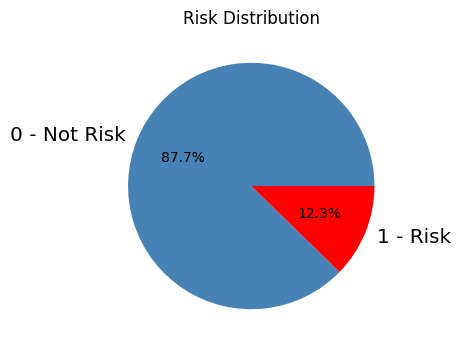

In [18]:
# Define mapping for Risk_Flag
risk_mapping = {0: "0 - Not Risk", 1: "1 - Risk"}

# Create the pie chart
plt.pie(df['Risk_Flag'].value_counts().values,
        labels=[risk_mapping[label] for label in df['Risk_Flag'].value_counts().index],
        autopct='%0.1f%%', colors = ('steelblue','red'))
plt.title('Risk Distribution')


**Data Insight**

Mayoritas 87,7% peminjam diklasifikasikan sebagai "Tidak Beresiko", sementara hanya 12,3% yang termasuk dalam kategori "Beresiko". Hal ini penting untuk dipertimbangkan dalam model prediksi, karena model bisa bias terhadap kelas mayoritas

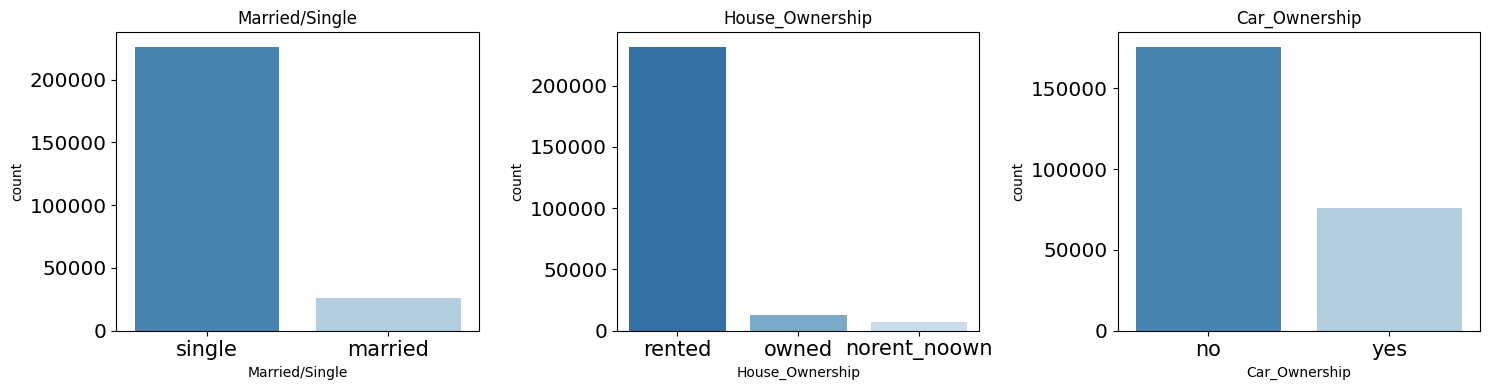

In [19]:
# Assuming cats is a list of column names
cols_to_plot = cats[1:4]

plt.figure(figsize=(15, 4))  # Adjust figure size for visibility

for i in range(len(cols_to_plot)):
    col = cols_to_plot[i]
    plt.subplot(1, len(cols_to_plot), i+1)

    # Get sorted categories based on frequency for consistent color mapping
    value_counts = df[col].value_counts()
    sorted_categories = value_counts.index

    # Create reversed palette and map to categories
    palette = sns.color_palette("Blues_r", n_colors=len(sorted_categories))
    color_dict = dict(zip(sorted_categories, palette))

    # Plot
    sns.countplot(x=col, data=df, palette=color_dict, order=sorted_categories)
    plt.title(col)
    plt.xticks(fontsize=15)

plt.tight_layout()

plt.show()

**Data Insight**

Mayoritas peminjam adalah single, menyewa rumah, dan tidak memiliki mobil

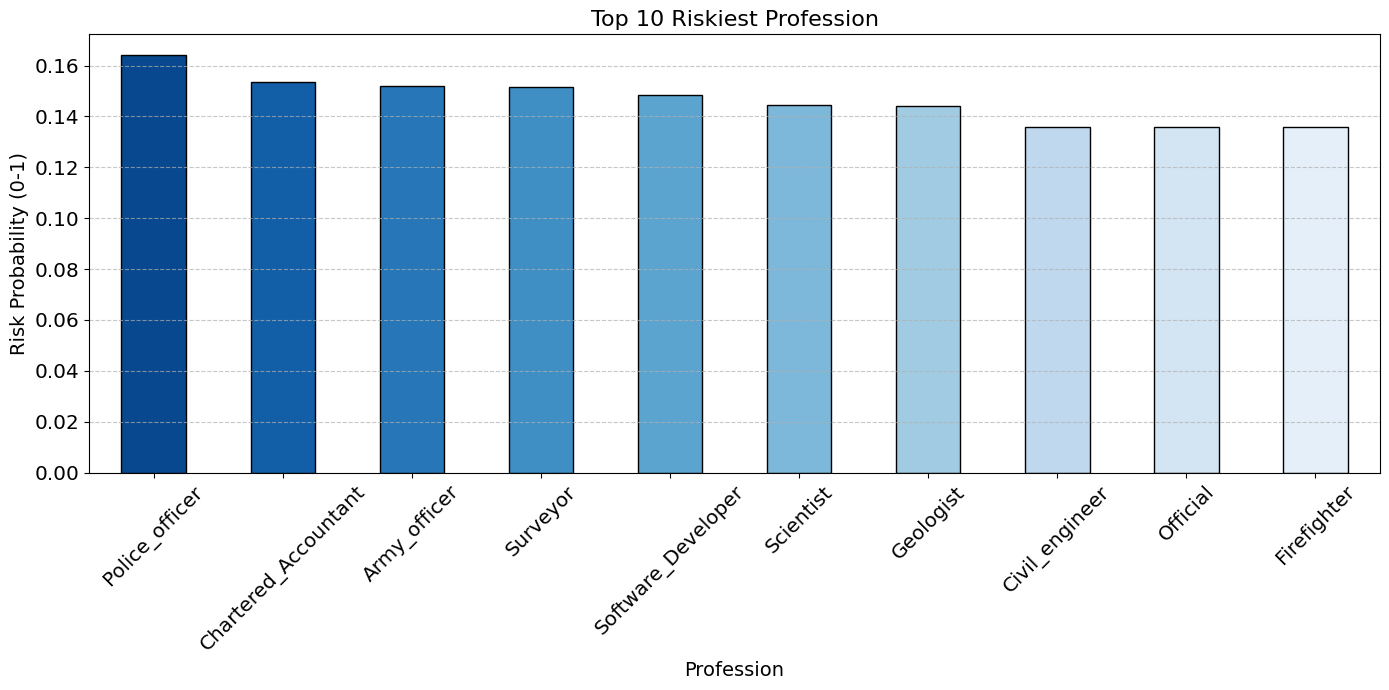

In [20]:
# Calculate mean risk by profession and sort
risk_by_profession = df.groupby('Profession')['Risk_Flag'].mean().sort_values(ascending=False)
top_risky_profession = risk_by_profession.head(10)

# Create reversed palette so darkest blue = highest risk
palette = sns.color_palette("Blues_r", n_colors=10)

# Map top professions to colors
colors = dict(zip(top_risky_profession.index, palette))
bar_colors = [colors[prof] for prof in top_risky_profession.index]

# Plot
plt.figure(figsize=(14, 7))
top_risky_profession.plot(kind='bar', color=bar_colors, edgecolor='black')
plt.title('Top 10 Riskiest Profession', fontsize=16)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Risk Probability (0-1)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Data Insight**  
Police officer, Chartered accountant, Education administrator, Army officer ‚Üí Top professions with the highest risk probability.

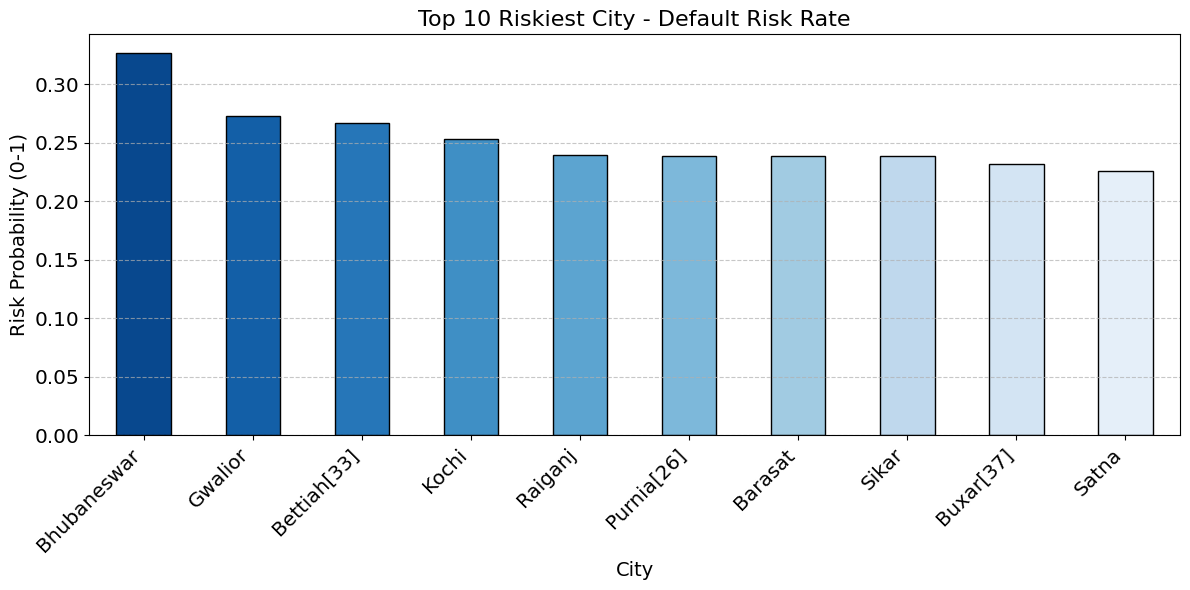

In [21]:
risk_by_city = df.groupby('CITY')['Risk_Flag'].mean().sort_values(ascending=False)
top_risky = risk_by_city.head(10)

# Create reversed palette so darkest blue = highest risk
palette = sns.color_palette("Blues_r", n_colors=10)

# Map top professions to colors
colors = dict(zip(top_risky_profession.index, palette))
bar_colors = [colors[prof] for prof in top_risky_profession.index]

plt.figure(figsize=(12,6))
top_risky.plot(kind='bar', color=bar_colors, edgecolor='black')
plt.title('Top 10 Riskiest City - Default Risk Rate', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Risk Probability (0-1)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Data Insight**  
Bhubaneswar, Gwalior, and Bettiah are the top three cities with the highest default risk probabilities, exceeding 25%.

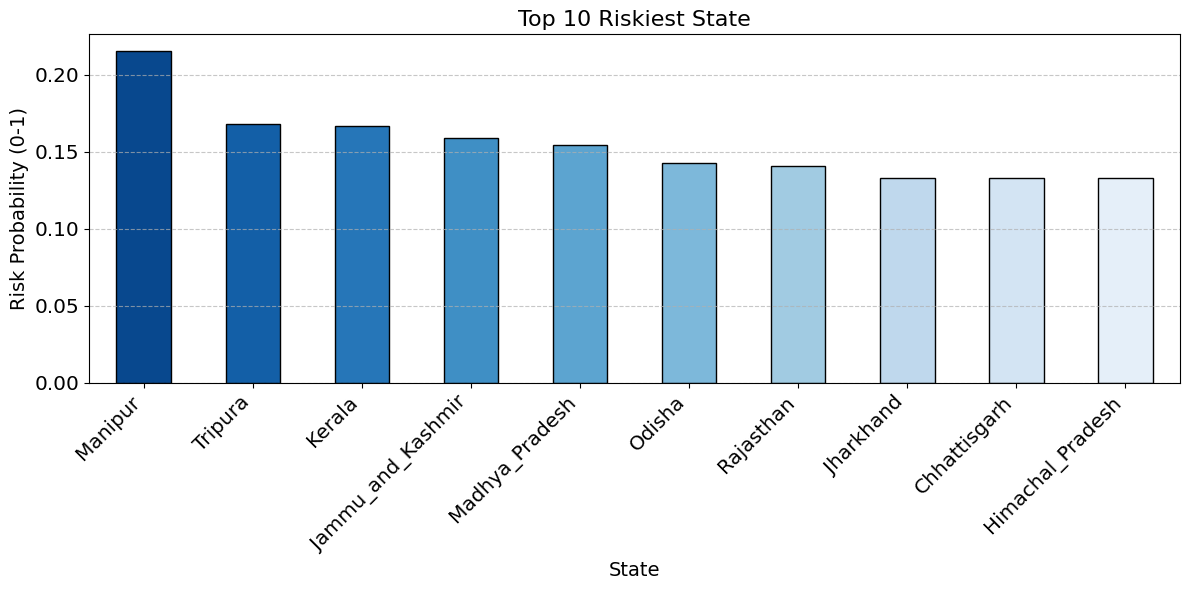

In [22]:
risk_by_state = df.groupby('STATE')['Risk_Flag'].mean().sort_values(ascending=False)

top_risky_state = risk_by_state.head(10)


plt.figure(figsize=(12,6))
top_risky_state.plot(kind='bar', color=bar_colors, edgecolor='black')
plt.title('Top 10 Riskiest State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Risk Probability (0-1)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Data Insight**  
Manipur, Tripura, and Kerala as the top three states with the highest default risk probabilities, with Manipur standing out at over 21% risk.

# Multivariate Analysis

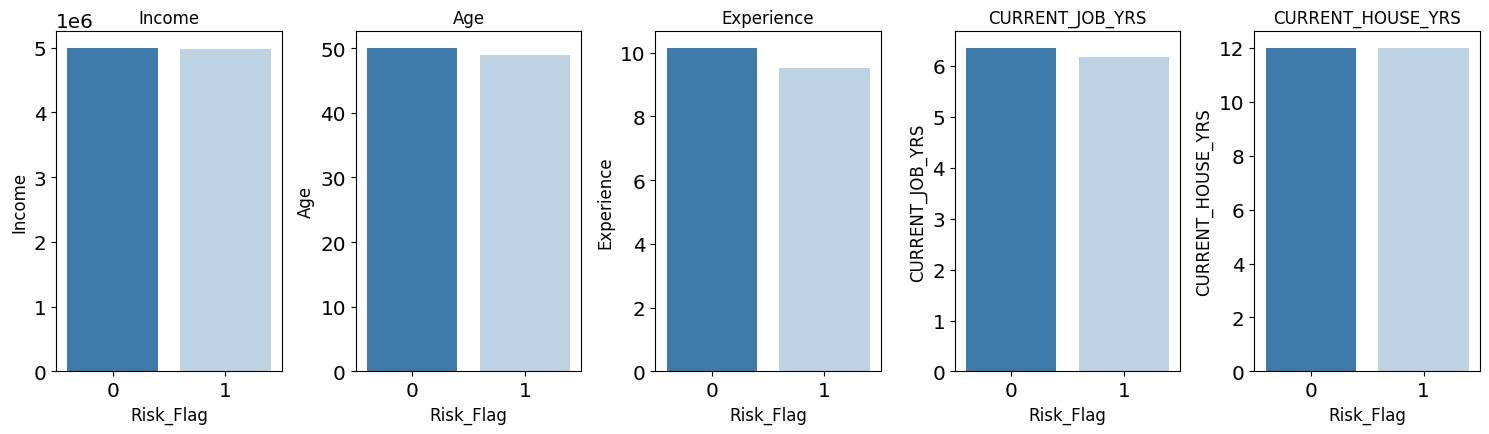

In [23]:
plt.figure(figsize=(15, 8))
for i in range(0, len(nums[:-1])):
    plt.subplot(2, len(nums[:-1]), i+1)
    palette = sns.color_palette("Blues", n_colors=9)
    sns.barplot(x="Risk_Flag", y=nums[i], data=df, estimator=np.mean, errorbar=None, palette=[palette[6], palette[2]])
    plt.title(f'{nums[i]}', fontsize=12)
    plt.ylabel(nums[i],fontsize=12)
    plt.xlabel('Risk_Flag',fontsize=12)
    plt.xticks(rotation = 0)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Data Insight**

Semua variabel (Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS) tidak menunjukkan perbedaan signifikan antara kelompok Risk dan Not Risk, sehingga bukan menjadi indikator kuat dalam mempengaruhi resiko

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

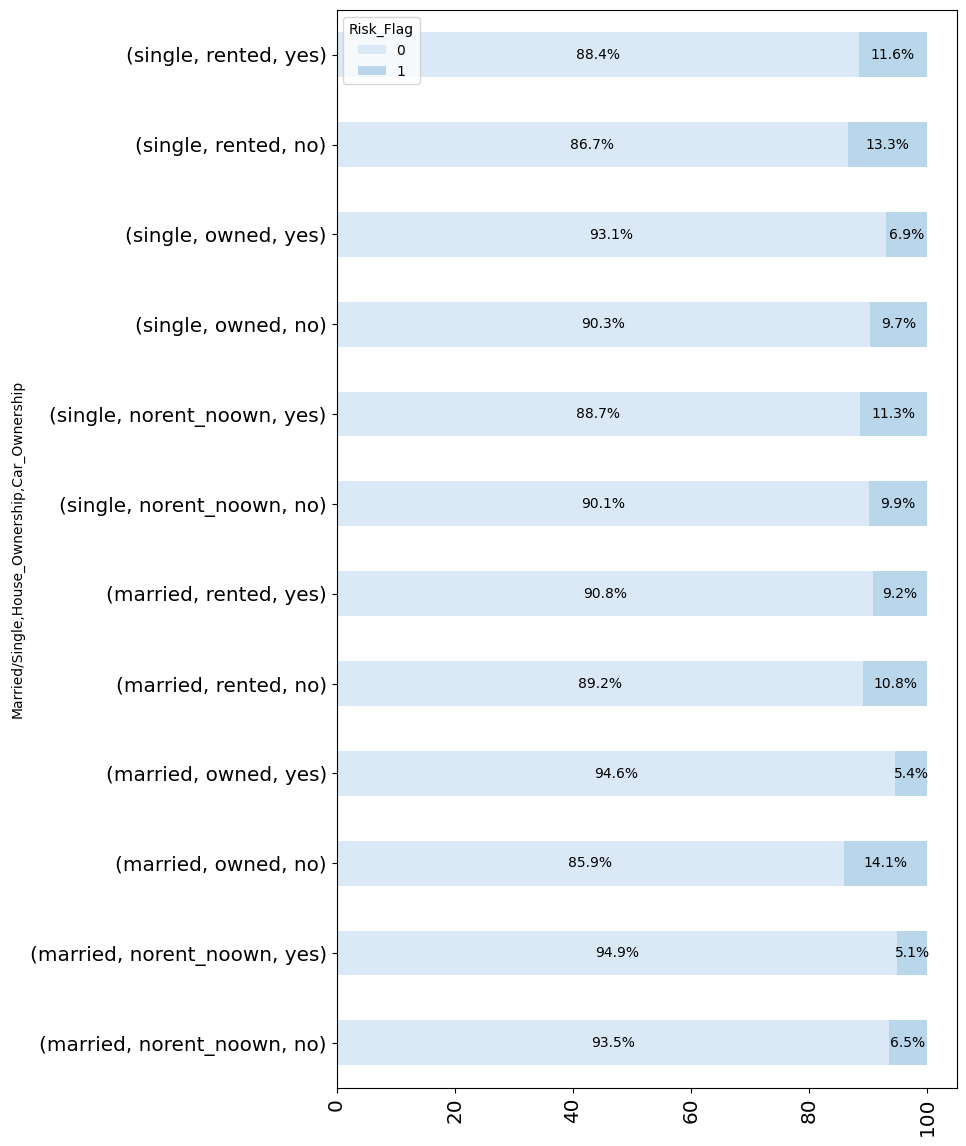

In [24]:
dfi = df.groupby(['Married/Single','House_Ownership','Car_Ownership','Risk_Flag'])['Id'].count().reset_index().rename(columns={'Id':'Total Customer'})
dfi['Percentage']=dfi.groupby(['Married/Single','House_Ownership','Car_Ownership'])['Total Customer'].transform(lambda x: round((x / x.sum()) * 100, 2))
dfpiv= dfi.pivot_table(index=['Married/Single','House_Ownership','Car_Ownership'], columns='Risk_Flag', values='Percentage')
colors = sns.color_palette("Blues")
av = dfpiv.plot(kind="barh", stacked=True, figsize=(8,14), color=colors)
for bars in av.containers:
    av.bar_label(bars, fmt="%.1f%%", label_type="center", color="black")
plt.xticks(rotation = 90)

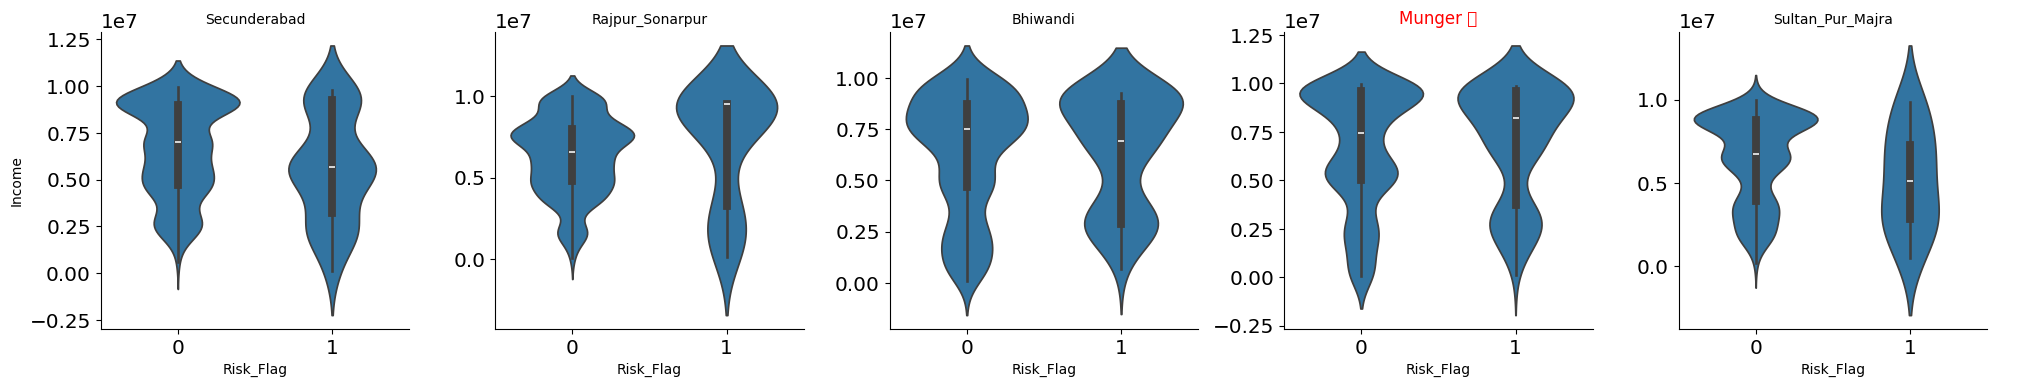

In [25]:
avg_income_per_city = df.groupby('CITY')['Income'].mean().sort_values(ascending=False)
top10_cities = avg_income_per_city.head(5).index


df_top10 = df[df['CITY'].isin(top10_cities)]


g = sns.catplot(
    data=df_top10,
    x="Risk_Flag", y="Income",
    col="CITY", col_wrap=5,
    kind="violin",
    sharey=False,
    height=4, aspect=1
)

top_city = avg_income_per_city.index[0]
g.set_titles(col_template="{col_name}" + (" üî∫" if "{col_name}" == top_city else ""))

for ax in g.axes.flatten():
    city = ax.get_title()
    if top_city in city:
        ax.set_title(f"{city} üî∫", color="red")

plt.subplots_adjust(top=0.9)
plt.show()

**Data Insight**

  Peminjam dengan resiko tertinggi merupakan seorang yg menikah, memiliki rumah namun tidak memiliki mobil.

## Chi Square Test

In [26]:
def chi_squared_test(df, cat1, cat2):

    """
    Conducting a Chi-Squared Hypothesis Test.
    :param df:
    :param cat1:
    :param cat2:
    :return:
    """
    print(f'{cat1} and {cat2}')
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    res = stats.chi2_contingency(contingency_table)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(res.pvalue))
    if res.pvalue <= alpha:
        print(f"There is a significant relationship (dependency) between {cat1} and {cat2}")
    else:
        print(f'{cat1} and {cat2} are independent (no significant relationship).')
    print('--------------------------------------')

In [27]:
for i in cats[1:]:
  chi_squared_test(df, cat1=i, cat2='Risk_Flag')

Married/Single and Risk_Flag
p value is 3.773053705715196e-26
There is a significant relationship (dependency) between Married/Single and Risk_Flag
--------------------------------------
House_Ownership and Risk_Flag
p value is 1.8381930028370595e-40
There is a significant relationship (dependency) between House_Ownership and Risk_Flag
--------------------------------------
Car_Ownership and Risk_Flag
p value is 1.7350853850183746e-33
There is a significant relationship (dependency) between Car_Ownership and Risk_Flag
--------------------------------------
Profession and Risk_Flag
p value is 5.108641602000937e-98
There is a significant relationship (dependency) between Profession and Risk_Flag
--------------------------------------
CITY and Risk_Flag
p value is 0.0
There is a significant relationship (dependency) between CITY and Risk_Flag
--------------------------------------
STATE and Risk_Flag
p value is 2.0057472384130266e-136
There is a significant relationship (dependency) betwe

**Data Insight**

  Semua features kategorikal memiliki korelasi dengan column target Risk_flag.

## Anova

In [28]:
def compute_anova(df, nums, cats):
    print(f'Anova : {nums} and {cats}')

    # Example data
    unique_groups = df[cats].unique()

    # Create a list to store numerical values for each group
    groups = [df[df[cats] == group][nums] for group in unique_groups]

    # ANOVA test
    f_stat, p_value = f_oneway(*groups)

    print(f"F-statistic: {f_stat}, P-value: {p_value}")

    if p_value <= 0.05:
        print(f"{nums} among {cats}'s {len(unique_groups)} categories are significantly different")
    else:
        print(f"{nums} among {cats}'s {len(unique_groups)} categories are not significantly difference")
    print('--------------------------------------')

In [29]:
for i in nums[:-1]:
  compute_anova(df,nums=i,cats='Risk_Flag')

Anova : Income and Risk_Flag
F-statistic: 2.4079446287996715, P-value: 0.1207220319583281
Income among Risk_Flag's 2 categories are not significantly difference
--------------------------------------
Anova : Age and Risk_Flag
F-statistic: 119.91850679948466, P-value: 6.687623647499306e-28
Age among Risk_Flag's 2 categories are significantly different
--------------------------------------
Anova : Experience and Risk_Flag
F-statistic: 300.69230651920316, P-value: 2.5475634865752383e-67
Experience among Risk_Flag's 2 categories are significantly different
--------------------------------------
Anova : CURRENT_JOB_YRS and Risk_Flag
F-statistic: 72.34852624927743, P-value: 1.813221223267855e-17
CURRENT_JOB_YRS among Risk_Flag's 2 categories are significantly different
--------------------------------------
Anova : CURRENT_HOUSE_YRS and Risk_Flag
F-statistic: 4.823851147277152, P-value: 0.028069472774381213
CURRENT_HOUSE_YRS among Risk_Flag's 2 categories are significantly different
-------

**Data Insight**

  Income yang biasanya merupakan acuan utama penentu Risk_flag ternyata tidak memiliki korelasi dengan Risk_flag pada kasus ini. Feature ini dapat di drop dan dilakukan feature engineering berupa binning untuk tetap menggunakan informasinya.

<Axes: >

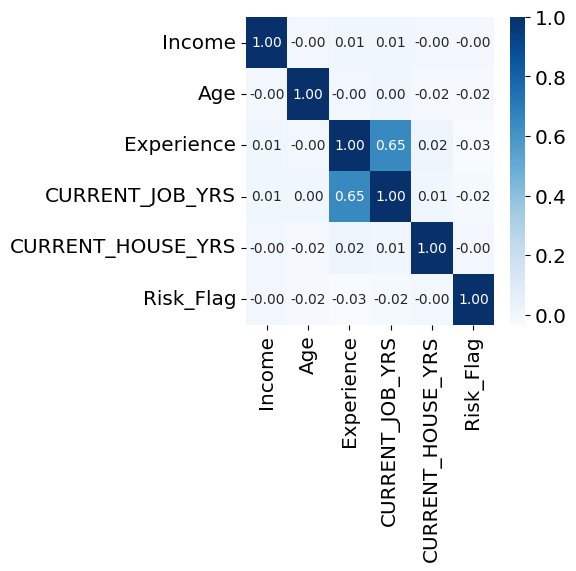

In [30]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.select_dtypes(["float64", "int64", "boolean"]).corr(), cmap='Blues', annot=True, fmt='.2f', color=colors)

# Feature Engineering(New Feature)

### 1. Income Level

In [31]:
def categorize_income(income):
    if income < 125000:
        return 'Low'
    elif income < 500000 :
        return 'Lower-Middle'
    elif income < 3000000 :
        return 'Middle'
    else:
        return 'High'

# Apply the function
df['Income_Level'] = df['Income'].apply(categorize_income)

In [32]:
df.groupby('Income_Level')['Income'].agg(['min', 'max']).astype(int)

min      max
Income_Level                  
High          3000077  9999938
Low             10310   124871
Lower-Middle   125676   499942
Middle         500098  2999973

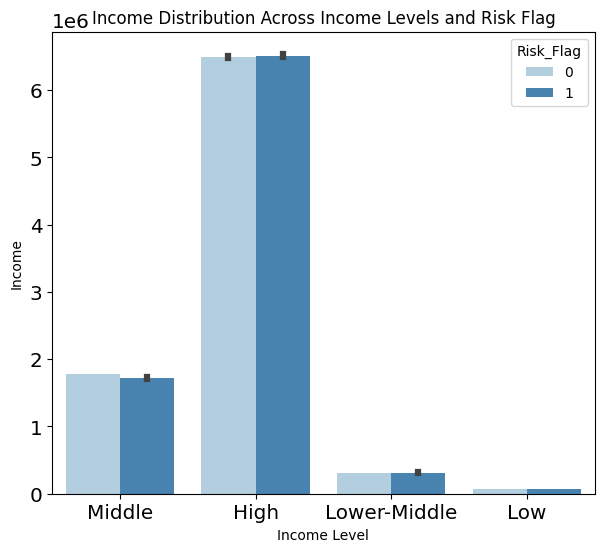

In [33]:
plt.figure(figsize=(7,6))
sns.barplot(x="Income_Level", y='Income', hue="Risk_Flag", data=df, palette='Blues')
plt.title('Income Distribution Across Income Levels and Risk Flag')
plt.xlabel('Income Level')
plt.legend(title='Risk_Flag')
plt.show()

In [34]:
chi_squared_test(df, cat1='Income_Level', cat2='Risk_Flag')

Income_Level and Risk_Flag
p value is 3.282943296408486e-11
There is a significant relationship (dependency) between Income_Level and Risk_Flag
--------------------------------------


**Data Insight**

  Income_level memiliki korelasi dengan Risk_flag dan dapat menjadi alternatif pengganti income yang tidak berkorelasi dengan Risk_flag

# Feature Encoding

### One-Hot Encoding

In [35]:
One_hot = ['Car_Ownership', 'Married/Single', 'House_Ownership']
for cat in One_hot:
    dummies = pd.get_dummies(df[cat], prefix=cat, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

df.drop(columns=One_hot, inplace=True)

### Label Encoder

In [36]:
df['Income_Level'] = df['Income_Level'].map({'High': 3, 'Middle': 2, 'Lower-Middle': 1, 'Low': 0})

### Heatmap

<Axes: >

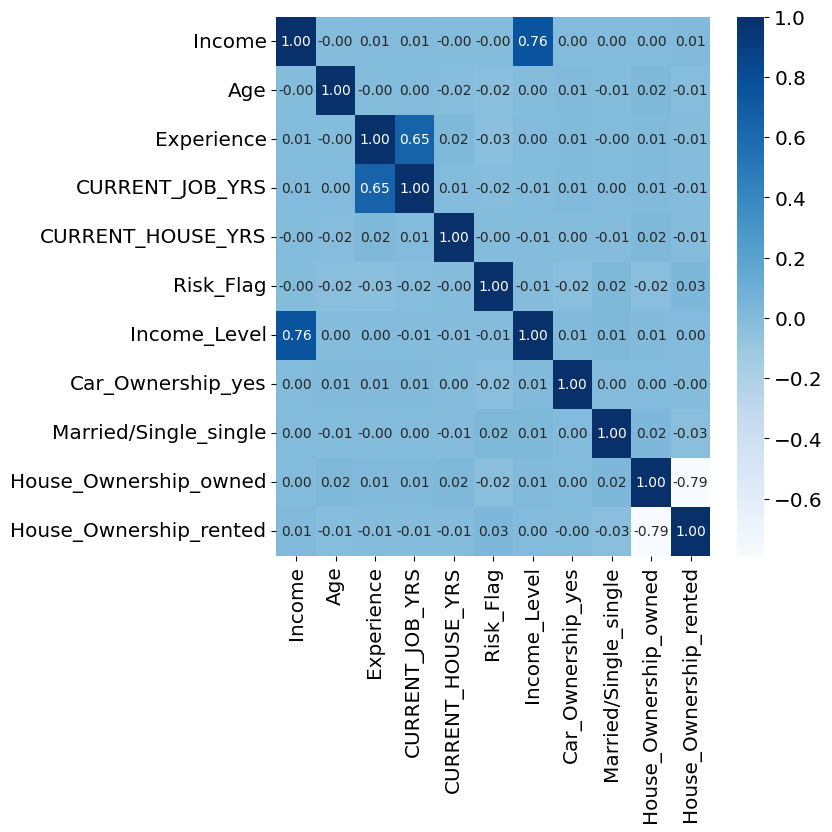

In [37]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.select_dtypes(include=['int','bool']).corr(), cmap='Blues', annot=True, fmt='.2f')

In [38]:
# drop unnecessary
df.drop(['Id','Income'], axis=1, inplace=True)

# Split Data

In [39]:
X = df.drop(['Risk_Flag'], axis=1)
y = df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X_test_before = X_test.copy()

In [41]:
X_test_before.shape

(75600, 12)

In [42]:
def detect_outliers_iqr(X_train, column):
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    return outliers

In [43]:
nums = X_train.select_dtypes(["float64", "int64"]).columns

for col in nums:
    iqr_outliers = detect_outliers_iqr(X_train, col)

    if not iqr_outliers.empty:
        print(f"Outliers detected in {col}:")
        print("\n" + "-"*50 + "\n")  # Separator for better readability
    else:
        print(f"No outliers detected in {col}\n")

No outliers detected in Age

No outliers detected in Experience

No outliers detected in CURRENT_JOB_YRS

No outliers detected in CURRENT_HOUSE_YRS

Outliers detected in Income_Level:

--------------------------------------------------



In [44]:
print(f'Jumlah baris sebelum memfilter outlier: {len(X_train)}')

numeric_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
X_train_numeric = X_train[numeric_cols]

Q1 = X_train_numeric.quantile(0.25)
Q3 = X_train_numeric.quantile(0.75)
IQR = Q3 - Q1

filtered = ~((X_train_numeric < (Q1 - 1.5 * IQR)) | (X_train_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the filter to full X_train and y_train
X_train = X_train[filtered]
y_train = y_train[filtered]

print(f'Jumlah baris setelah memfilter outlier: {len(X_train)}')

Jumlah baris sebelum memfilter outlier: 176400
Jumlah baris setelah memfilter outlier: 174489


**Data Insight**

  Tidak terdapat outliers pada data.

#Target Encoding (Profession,City,State)

In [45]:
def target_encode_columns(X_train, X_test, y_train, columns_to_encode):

    train = X_train.copy()
    test = X_test.copy()
    train['Risk_Flag'] = y_train

    overall_mean = y_train.mean()

    for col in columns_to_encode:
        # Calculate mean target encoding on training data
        target_mean = train.groupby(col)['Risk_Flag'].mean()

        # Map to train and test
        train[f'{col}_encoded'] = train[col].map(target_mean)
        test[f'{col}_encoded'] = test[col].map(target_mean)

        # Fill unseen categories in test
        test[f'{col}_encoded'].fillna(overall_mean, inplace=True)

        # Drop original categorical column
        train.drop(columns=[col], inplace=True)
        test.drop(columns=[col], inplace=True)

    # Drop Risk_Flag from train
    X_train = train.drop(columns='Risk_Flag')
    X_test = test

    return X_train, X_test

In [46]:
columns_to_encode = ['Profession', 'STATE', 'CITY']

X_train, X_test = target_encode_columns(X_train, X_test, y_train, columns_to_encode)

In [47]:
X_train

Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Income_Level  \
8166     40          12               11                 11             3   
84279    72           1                1                 11             3   
37928    26           5                3                 14             3   
153707   79          15               13                 13             3   
63484    31          20                7                 12             3   
...     ...         ...              ...                ...           ...   
119879   59           1                1                 12             2   
103694   51          20                7                 10             3   
131932   25           5                5                 10             3   
146867   40           2                2                 14             3   
121958   70           7                7                 13             2   

        Car_Ownership_yes  Married/Single_single  House_Ownership_owned  \
8166                 True                   True                  False   
84279               False                   True                  False   
37928               False                   True                  False   
153707              False                  False                  False   
63484                True                   True                  False   
...                   ...                    ...                    ...   
119879               True                   True                  False   
103694              False                  False                  False   
131932              False                   True                  False   
146867               True                   True                  False   
121958               True                   True                  False   

        House_Ownership_rented  Profession_encoded  STATE_encoded  \
8166                      True            0.155452       0.157112   
84279                     True            0.131892       0.102019   
37928                     True            0.131183       0.126900   
153707                    True            0.134522       0.131201   
63484                     True            0.135230       0.117361   
...                        ...                 ...            ...   
119879                    True            0.155452       0.170507   
103694                    True            0.132880       0.117888   
131932                    True            0.134522       0.141115   
146867                    True            0.108774       0.117361   
121958                    True            0.108356       0.099698   

        CITY_encoded  
8166        0.168196  
84279       0.112069  
37928       0.092308  
153707      0.120654  
63484       0.129964  
...              ...  
119879      0.222609  
103694      0.123145  
131932      0.157009  
146867      0.098196  
121958      0.040404  

[174489 rows x 12 columns]

In [48]:
Unscaling_data = X_test.copy()

In [49]:
y_train.dtype

dtype('int64')

In [50]:
# Check Multicollinearity
combine = pd.concat([X_train, y_train], axis=1)

In [51]:
combine

Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Income_Level  \
8166     40          12               11                 11             3   
84279    72           1                1                 11             3   
37928    26           5                3                 14             3   
153707   79          15               13                 13             3   
63484    31          20                7                 12             3   
...     ...         ...              ...                ...           ...   
119879   59           1                1                 12             2   
103694   51          20                7                 10             3   
131932   25           5                5                 10             3   
146867   40           2                2                 14             3   
121958   70           7                7                 13             2   

        Car_Ownership_yes  Married/Single_single  House_Ownership_owned  \
8166                 True                   True                  False   
84279               False                   True                  False   
37928               False                   True                  False   
153707              False                  False                  False   
63484                True                   True                  False   
...                   ...                    ...                    ...   
119879               True                   True                  False   
103694              False                  False                  False   
131932              False                   True                  False   
146867               True                   True                  False   
121958               True                   True                  False   

        House_Ownership_rented  Profession_encoded  STATE_encoded  \
8166                      True            0.155452       0.157112   
84279                     True            0.131892       0.102019   
37928                     True            0.131183       0.126900   
153707                    True            0.134522       0.131201   
63484                     True            0.135230       0.117361   
...                        ...                 ...            ...   
119879                    True            0.155452       0.170507   
103694                    True            0.132880       0.117888   
131932                    True            0.134522       0.141115   
146867                    True            0.108774       0.117361   
121958                    True            0.108356       0.099698   

        CITY_encoded  Risk_Flag  
8166        0.168196          0  
84279       0.112069          0  
37928       0.092308          0  
153707      0.120654          0  
63484       0.129964          0  
...              ...        ...  
119879      0.222609          1  
103694      0.123145          0  
131932      0.157009          0  
146867      0.098196          0  
121958      0.040404          0  

[174489 rows x 13 columns]

<Axes: >

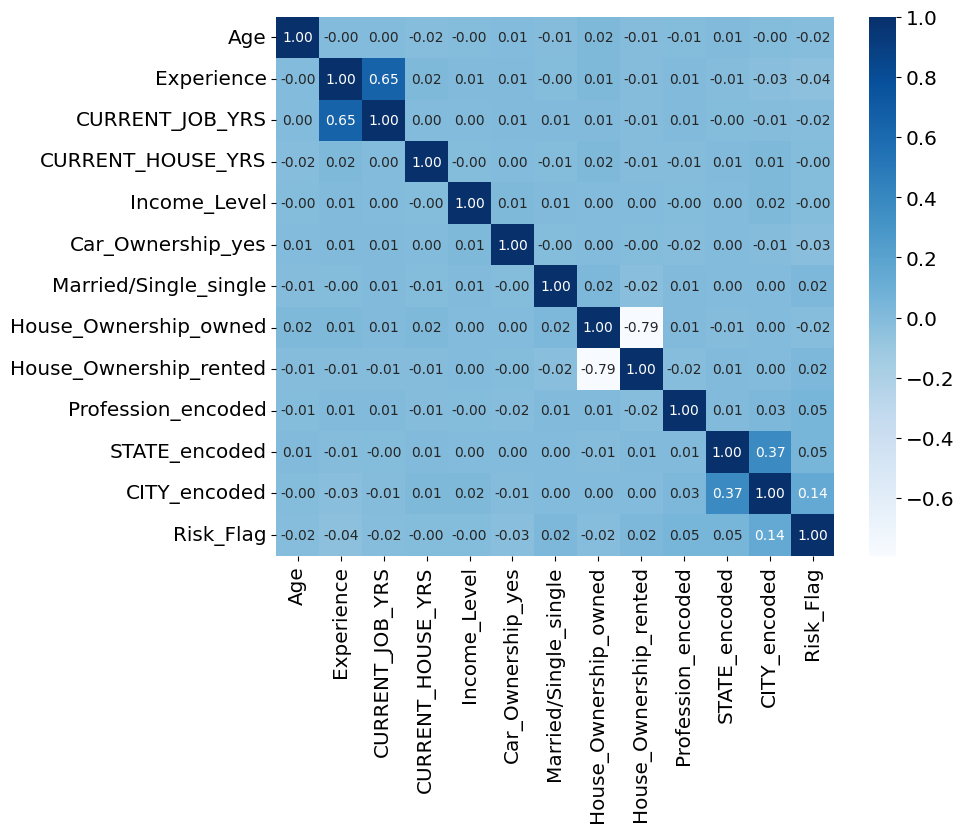

In [52]:
plt.figure(figsize=(9, 7))
sns.heatmap(combine.select_dtypes(include=['int','float','bool']).corr(), cmap='Blues', annot=True, fmt='.2f')

# Scaling

In [53]:
# List of numerical features
new_nums = X_train.columns.tolist()

scaler = StandardScaler()

# Fit the scaler on the entire X_train
X_train[new_nums] = scaler.fit_transform(X_train[new_nums])
# Use the same scaler to X_test
X_test[new_nums] = scaler.transform(X_test[new_nums])

# Feature Selection

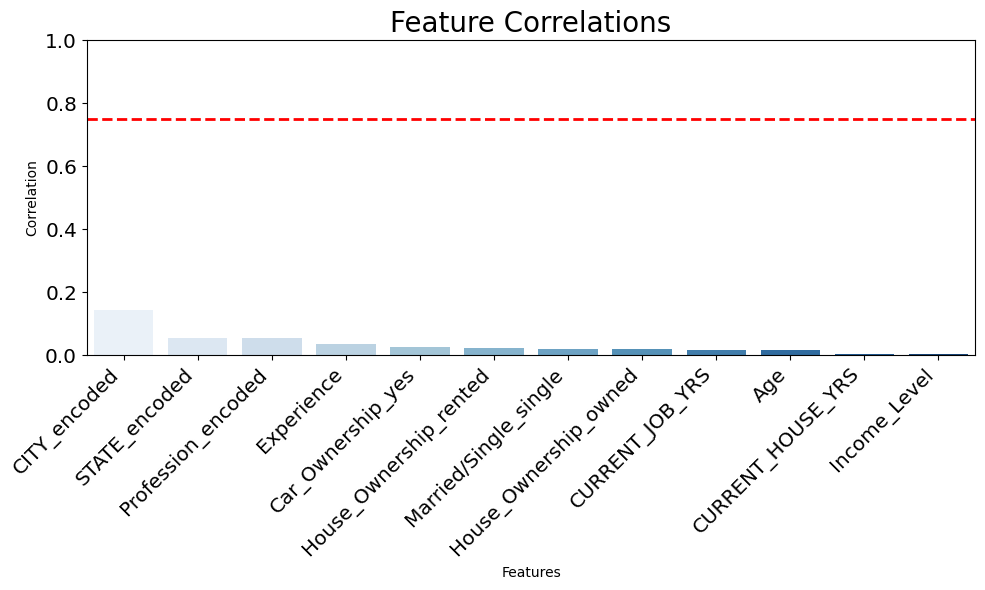

In [54]:
new_df = pd.concat([X_train, y_train], axis=1)
correlation = new_df.corr()["Risk_Flag"].drop("Risk_Flag").abs().sort_values(ascending=False)

# Create DataFrame for plotting
corr_df = correlation.reset_index()
corr_df.columns = ["Feature", "Correlation"]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x="Feature", y="Correlation", palette='Blues', label="Correlation value")

# Add threshold line (e.g., 0.75)
plt.axhline(y=0.75, color='red', linestyle='--', linewidth=2)

# Customize plot
plt.title("Feature Correlations", fontsize=20)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

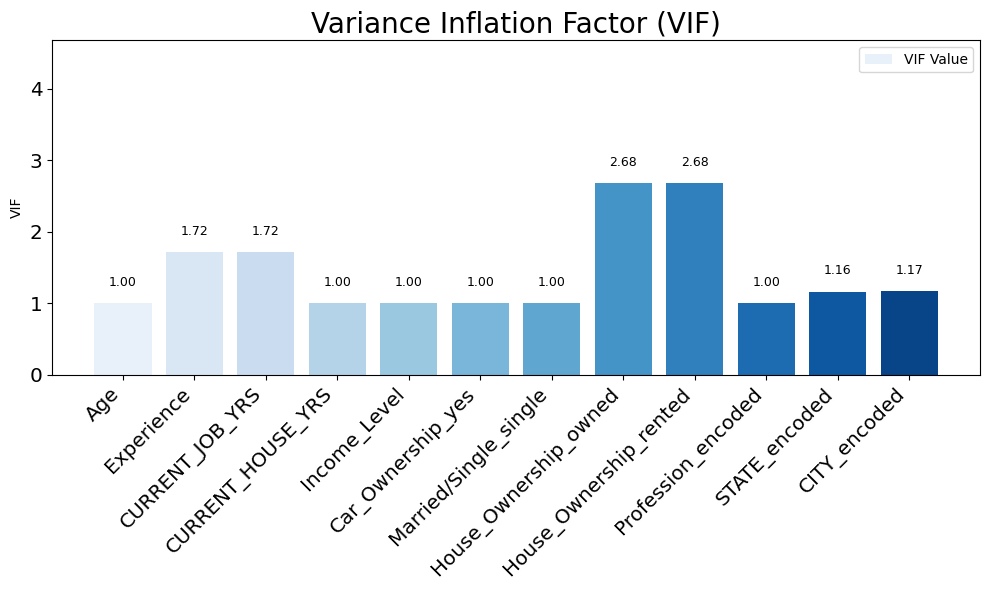

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_data = X_train.copy()  # Replace with your DataFrame
X = vif_data.select_dtypes(include=['int64', 'float64']).dropna()
X_const = add_constant(X)

# Step 2: Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

# Step 3: Cap VIF at 50 for plotting
vif["VIF_capped"] = vif["VIF"].clip(upper=50)

# Optional: Label VIFs (e.g., "50+" for capped values)
vif["Label"] = vif.apply(lambda x: f"{x['VIF']:.2f}" if x['VIF'] <= 50 else "50+", axis=1)

# Step 4: Plot
plt.figure(figsize=(10, 6))
color = sns.color_palette("Blues", n_colors=len(vif))
bars = plt.bar(vif["Feature"], vif["VIF_capped"], color=color, label="VIF Value")
plt.title("Variance Inflation Factor (VIF)", fontsize=20)
plt.ylabel("VIF")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, vif["VIF_capped"].max() + 2)

# Annotate VIF values on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             vif["Label"].iloc[i], ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


# Class Imbalance

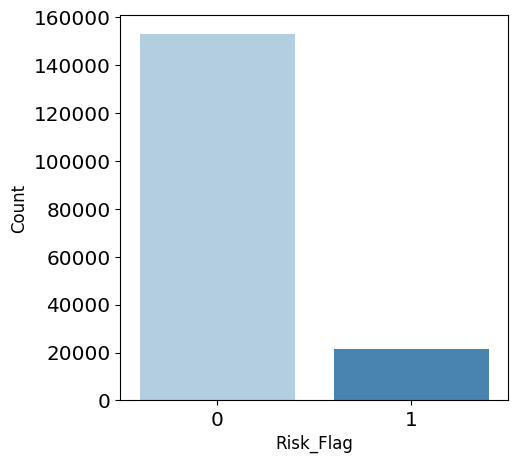

In [56]:
#Before UnderSampling
y_train_df = y_train.to_frame()
plt.figure(figsize=(5, 5))
sns.countplot(x="Risk_Flag", data=y_train_df, palette="Blues")
plt.xlabel('Risk_Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [57]:
df['Risk_Flag'].value_counts(normalize=True)

Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64

### UnderSampling

In [58]:
X_train.shape

(174489, 12)

In [59]:
rus = RandomUnderSampler(random_state=42)

X_train, y_train = rus.fit_resample(X_train, y_train)

In [60]:
y_train.value_counts(normalize=True)

Risk_Flag
0    0.5
1    0.5
Name: proportion, dtype: float64

In [61]:
X_train.shape

(42856, 12)

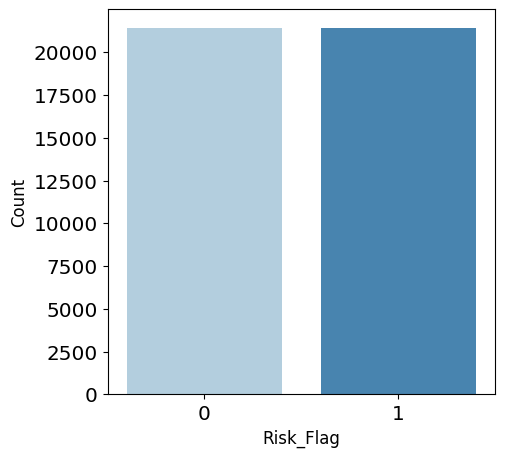

In [62]:
#After UnderSampling
y_train_after = y_train.to_frame()
plt.figure(figsize=(5, 5))
sns.countplot(x="Risk_Flag", data=y_train_after, palette="Blues")
plt.xlabel('Risk_Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [63]:
X_train

Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
192166 -0.528318    0.486293        -0.363405          -1.424930   
44211  -1.699560    1.485074         2.101618           0.004152   
78085   1.169983   -0.678952        -0.089514           1.433234   
2985   -0.996815    1.152147         2.101618           0.004152   
172457  1.404231    1.651538        -0.089514           1.433234   
...          ...         ...              ...                ...   
84654  -1.582436    0.819220         1.006052           1.433234   
235796  0.174427   -0.013098         1.006052           0.004152   
194027 -1.406749   -0.013098         1.006052           0.004152   
191335 -1.348187   -0.845415        -0.637297           0.004152   
119879  0.525800   -1.511270        -1.458971           0.004152   

        Income_Level  Car_Ownership_yes  Married/Single_single  \
192166      0.608081          -0.656747                 0.3369   
44211      -1.209536           1.522656                 0.3369   
78085       0.608081           1.522656                 0.3369   
2985       -1.209536           1.522656                 0.3369   
172457      0.608081          -0.656747                 0.3369   
...              ...                ...                    ...   
84654      -3.027153          -0.656747                 0.3369   
235796     -1.209536           1.522656                 0.3369   
194027     -1.209536          -0.656747                 0.3369   
191335      0.608081           1.522656                 0.3369   
119879     -1.209536           1.522656                 0.3369   

        House_Ownership_owned  House_Ownership_rented  Profession_encoded  \
192166               -0.23263                0.293917            0.523330   
44211                -0.23263                0.293917           -0.040516   
78085                -0.23263                0.293917           -0.040516   
2985                 -0.23263                0.293917            0.658331   
172457               -0.23263                0.293917            0.595438   
...                       ...                     ...                 ...   
84654                -0.23263                0.293917           -0.759094   
235796               -0.23263                0.293917           -0.621466   
194027                4.29867               -3.402320           -1.073996   
191335               -0.23263                0.293917            1.880146   
119879               -0.23263                0.293917            1.880146   

        STATE_encoded  CITY_encoded  
192166      -0.280159     -0.222479  
44211       -0.310170     -1.455420  
78085       -1.184455     -0.043973  
2985        -0.310170     -1.229248  
172457       0.563887      0.292573  
...               ...           ...  
84654       -0.191870     -0.245515  
235796      -0.310170      1.258952  
194027      -0.667415     -0.635324  
191335       0.560018      1.635090  
119879       2.718386      2.129142  

[42856 rows x 12 columns]

# **Modeling**

Pemilihan recall karena pada kasus loan predict, menghindari false negative (yaitu diprediksi "low risk" padahal sebenarnya "high risk"). Memberikan peminjam yang sebenarnya berisiko tinggi gagal bayar dapat berdampak pada kerugian finansial langsung, dan bisa sangat besar apabila ajuan pinjamannya besar. Menolak pinjaman dari customer yang sebenarnya "tidak berisiko", dampaknya lebih ringan, karena hanya menyebabkan kehilangan potensi keuntungan (opportunity loss), bukan kerugian langsung.


In [ ]:
def eval_classification(model, model_name):
    model.fit(X_train, y_train)

    metrics = {"Model": model_name}

    # Predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Basic metrics
    metrics["Recall Train"] = recall_score(y_train, y_pred_train)
    metrics["Recall Test"] = recall_score(y_test, y_pred_test)
    metrics["F1 Train"] = f1_score(y_train, y_pred_train)
    metrics["F1 Test"] = f1_score(y_test, y_pred_test)

    # Cross-validation
    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    metrics["Recall CV Train"] = score['train_score'].mean()
    metrics["Recall CV Test"] = score['test_score'].mean()

    return metrics

In [ ]:
results = []

models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGB" : XGBClassifier(),
    "Gaussian" : GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Ridge": RidgeClassifier(),
    "SGD": SGDClassifier(),
    "PassiveAggressive": PassiveAggressiveClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(verbose=False),
    "MLP" : MLPClassifier()
}

for name, model in models.items():
    metrics = eval_classification(model, model_name=name)
    results.append(metrics)

df_results = pd.DataFrame(results)
display(df_results.round(3))

Model  Recall Train  Recall Test  F1 Train  F1 Test  \
0       LogisticRegression         0.572        0.562     0.586    0.262   
1   DecisionTreeClassifier         0.999        0.865     0.960    0.577   
2             RandomForest         0.999        0.806     0.960    0.609   
3                      XGB         0.870        0.817     0.868    0.525   
4                 Gaussian         0.689        0.689     0.622    0.251   
5                      KNN         0.716        0.679     0.799    0.512   
6                 AdaBoost         0.616        0.607     0.605    0.262   
7                    Ridge         0.571        0.559     0.585    0.262   
8                      SGD         0.606        0.604     0.595    0.256   
9        PassiveAggressive         0.330        0.333     0.396    0.174   
10        GradientBoosting         0.636        0.622     0.637    0.289   
11    HistGradientBoosting         0.782        0.748     0.776    0.410   
12              ExtraTrees         0.999        0.829     0.960    0.590   
13                LightGBM         0.762        0.734     0.766    0.408   
14                CatBoost         0.836        0.792     0.838    0.488   
15                     MLP         0.767        0.730     0.734    0.343   

    Recall CV Train  Recall CV Test  
0             0.572           0.572  
1             0.999           0.867  
2             0.999           0.803  
3             0.875           0.814  
4             0.689           0.687  
5             0.764           0.741  
6             0.626           0.620  
7             0.570           0.569  
8             0.540           0.541  
9             0.597           0.595  
10            0.639           0.630  
11            0.776           0.743  
12            0.999           0.820  
13            0.773           0.740  
14            0.837           0.791  
15            0.731           0.700

In [65]:
def eval_classification_single(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))

    # Use probabilities for roc_auc_score
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    print("ROC-AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train))
    print("ROC-AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba_test))

    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('Recall (crossval train): %.2f' % score['train_score'].mean())
    print('Recall (crossval test): %.2f' % score['test_score'].mean())

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix_and_metrics(model, labels=["Low Risk (0)", "Risk (1)"]):
    y_pred = model.predict(X_test)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # Plot
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()

In [67]:
from sklearn.metrics import confusion_matrix

def analyze_fp_fn_balance(model):
    y_pred = model.predict(X_test)
    # Confusion matrix breakdown
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total = tn + fp + fn + tp

    # Percentages
    fp_pct = fp / total * 100
    fn_pct = fn / total * 100

    print(f"True Positives (TP): {tp} ({tp / total:.2%})")
    print(f"True Negatives (TN): {tn} ({tn / total:.2%})")
    print(f"False Positives (FP): {fp} ({fp_pct:.2f}%)")
    print(f"False Negatives (FN): {fn} ({fn_pct:.2f}%)")

    # FP vs FN Balance Ratio
    if (fp + fn) > 0:
        balance_ratio = abs(fp - fn) / (fp + fn)
        print(f"\nüîÅ Balance between FP and FN (0 = perfect balance, 1 = completely unbalanced): {balance_ratio:.2f}")
    else:
        print("\nNo FP or FN to compare (perfect prediction).")

In [78]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_test.columns)
    feat_importances = feat_importances.nlargest(25)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="Blues_r")

    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Features Importance Score')
    plt.show()

# Xgboost

## Base Model

In [ ]:
xgb_model = XGBClassifier(verbosity=0, random_state=42)

print(f'Evaluate model: XGBClassifier sebelum tuning')
eval_classification_single(xgb_model)

Evaluate model: XGBClassifier sebelum tuning
Recall (Train Set): 0.87
Recall (Test Set): 0.82
ROC-AUC (Train Set): 0.93
ROC-AUC (Test Set): 0.87
Recall (crossval train): 0.88
Recall (crossval test): 0.81


In [ ]:
import json

config = xgb_model.get_booster().save_config()
parsed = json.loads(config)
print(json.dumps(parsed, indent=2))

{
  "learner": {
    "generic_param": {
      "device": "cpu",
      "fail_on_invalid_gpu_id": "0",
      "n_jobs": "0",
      "nthread": "0",
      "random_state": "42",
      "seed": "42",
      "seed_per_iteration": "0",
      "validate_parameters": "1"
    },
    "gradient_booster": {
      "gbtree_model_param": {
        "num_parallel_tree": "1",
        "num_trees": "100"
      },
      "gbtree_train_param": {
        "process_type": "default",
        "tree_method": "auto",
        "updater": "grow_quantile_histmaker",
        "updater_seq": "grow_quantile_histmaker"
      },
      "name": "gbtree",
      "specified_updater": false,
      "tree_train_param": {
        "alpha": "0",
        "cache_opt": "1",
        "colsample_bylevel": "1",
        "colsample_bynode": "1",
        "colsample_bytree": "1",
        "eta": "0.300000012",
        "gamma": "0",
        "grow_policy": "depthwise",
        "interaction_constraints": "",
        "lambda": "1",
        "learning_rate": "

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def plot_confusion_matrix_and_metrics(model, labels=["Low Risk (0)", "Risk (1)"]):
    y_pred = model.predict(X_test)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # Plot
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()

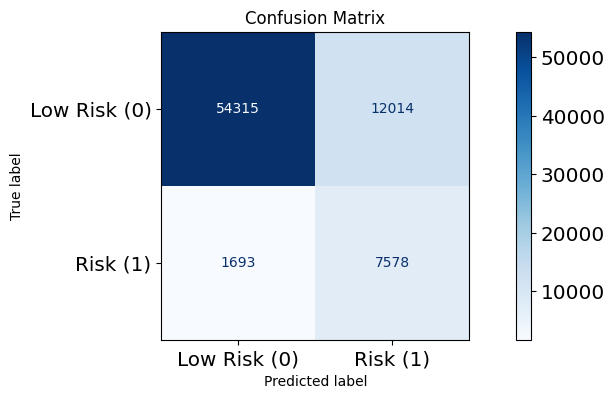

In [ ]:
plot_confusion_matrix_and_metrics(xgb_model)

In [ ]:
from sklearn.metrics import confusion_matrix

def analyze_fp_fn_balance(model):
    y_pred = model.predict(X_test)
    # Confusion matrix breakdown
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total = tn + fp + fn + tp

    # Percentages
    fp_pct = fp / total * 100
    fn_pct = fn / total * 100

    print(f"True Positives (TP): {tp} ({tp / total:.2%})")
    print(f"True Negatives (TN): {tn} ({tn / total:.2%})")
    print(f"False Positives (FP): {fp} ({fp_pct:.2f}%)")
    print(f"False Negatives (FN): {fn} ({fn_pct:.2f}%)")

    # FP vs FN Balance Ratio
    if (fp + fn) > 0:
        balance_ratio = abs(fp - fn) / (fp + fn)
        print(f"\nüîÅ Balance between FP and FN (0 = perfect balance, 1 = completely unbalanced): {balance_ratio:.2f}")
    else:
        print("\nNo FP or FN to compare (perfect prediction).")

In [ ]:
analyze_fp_fn_balance(xgb_model)

True Positives (TP): 7578 (10.02%)
True Negatives (TN): 54315 (71.85%)
False Positives (FP): 12014 (15.89%)
False Negatives (FN): 1693 (2.24%)

üîÅ Balance between FP and FN (0 = perfect balance, 1 = completely unbalanced): 0.75


In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_test.columns)
    feat_importances = feat_importances.nlargest(25)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="Blues") # Changed to sns.barplot

    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Features Importance Score')
    plt.show()

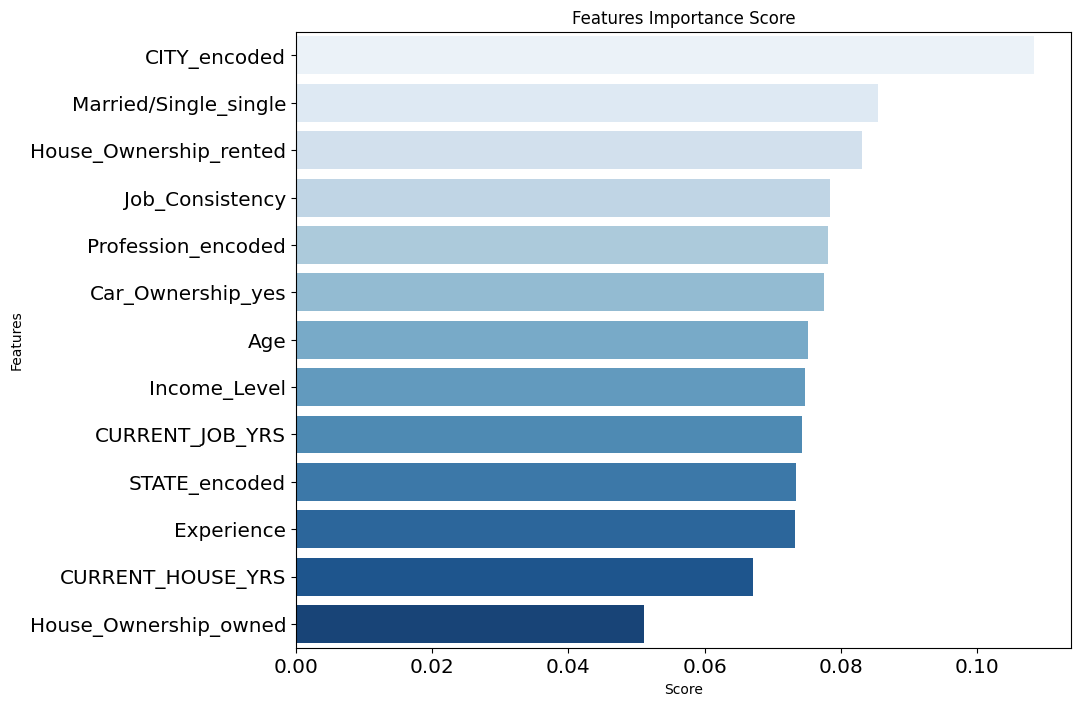

In [ ]:
show_feature_importance(xgb_model)

## Hyperparameter Tuning

### Learning Curve n_estimators

In [ ]:
def draw_xgb_curve_n_estimators(n_estimators):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in n_estimators:
        model = XGBClassifier(verbose=0, n_estimators=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'n_estimators: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(n_estimators, train_recall_scores, label='Train Recall')
    plt.plot(n_estimators, test_recall_scores, label='Test Recall')
    plt.xlabel('n_estimators')
    plt.ylabel('Recall Score')
    plt.title('Recall vs n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(n_estimators, train_roc_scores, label='Train ROC')
    plt.plot(n_estimators, test_roc_scores, label='Test ROC')
    plt.xlabel('n_estimators')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

n_estimators: 10; Recall Train: 0.6940, Test: 0.6713; ROCAUC Train: 0.7551, Test: 0.7286
n_estimators: 62; Recall Train: 0.8326, Test: 0.7905; ROCAUC Train: 0.9032, Test: 0.8520
n_estimators: 114; Recall Train: 0.8761, Test: 0.8198; ROCAUC Train: 0.9366, Test: 0.8757
n_estimators: 166; Recall Train: 0.9009, Test: 0.8290; ROCAUC Train: 0.9516, Test: 0.8861
n_estimators: 218; Recall Train: 0.9219, Test: 0.8296; ROCAUC Train: 0.9598, Test: 0.8918
n_estimators: 270; Recall Train: 0.9379, Test: 0.8321; ROCAUC Train: 0.9645, Test: 0.8961
n_estimators: 322; Recall Train: 0.9503, Test: 0.8351; ROCAUC Train: 0.9674, Test: 0.8987
n_estimators: 374; Recall Train: 0.9636, Test: 0.8336; ROCAUC Train: 0.9695, Test: 0.9006
n_estimators: 426; Recall Train: 0.9725, Test: 0.8368; ROCAUC Train: 0.9711, Test: 0.9024
n_estimators: 478; Recall Train: 0.9783, Test: 0.8366; ROCAUC Train: 0.9724, Test: 0.9033
n_estimators: 531; Recall Train: 0.9839, Test: 0.8387; ROCAUC Train: 0.9735, Test: 0.9042
n_estimators

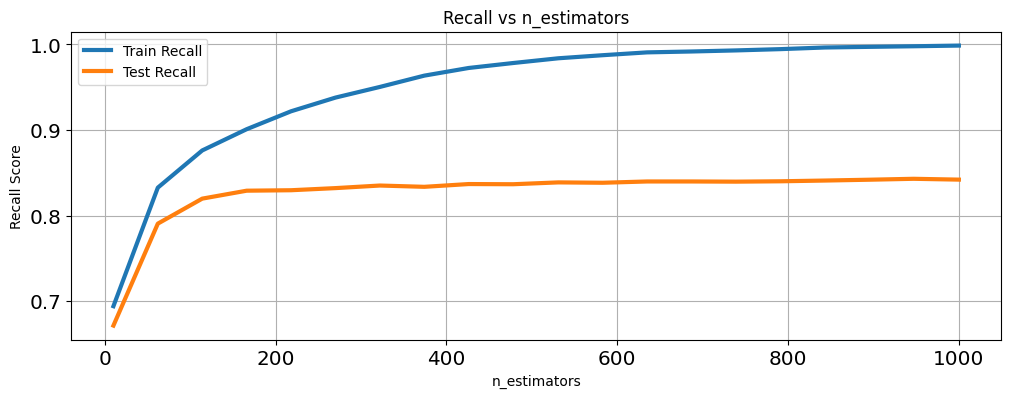

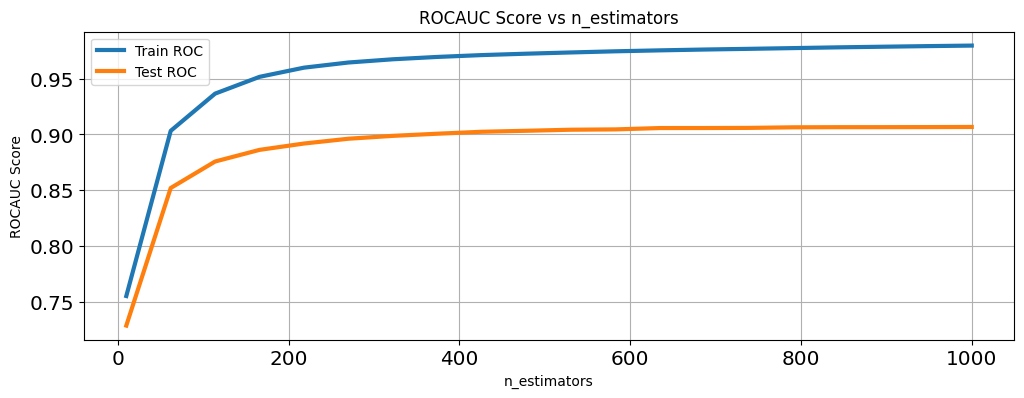

In [ ]:
n_estimators = [int(x) for x in np.linspace(10, 1000, 20)]
draw_xgb_curve_n_estimators(n_estimators)

n_estimators: 10; Recall Train: 0.6940, Test: 0.6713; ROCAUC Train: 0.7551, Test: 0.7286
n_estimators: 20; Recall Train: 0.7452, Test: 0.7150; ROCAUC Train: 0.8124, Test: 0.7755
n_estimators: 30; Recall Train: 0.7722, Test: 0.7389; ROCAUC Train: 0.8430, Test: 0.8026
n_estimators: 40; Recall Train: 0.7977, Test: 0.7602; ROCAUC Train: 0.8717, Test: 0.8270
n_estimators: 50; Recall Train: 0.8221, Test: 0.7818; ROCAUC Train: 0.8904, Test: 0.8415
n_estimators: 60; Recall Train: 0.8314, Test: 0.7876; ROCAUC Train: 0.9010, Test: 0.8497
n_estimators: 70; Recall Train: 0.8484, Test: 0.8044; ROCAUC Train: 0.9121, Test: 0.8585
n_estimators: 80; Recall Train: 0.8534, Test: 0.8088; ROCAUC Train: 0.9194, Test: 0.8642
n_estimators: 90; Recall Train: 0.8631, Test: 0.8151; ROCAUC Train: 0.9258, Test: 0.8688
n_estimators: 100; Recall Train: 0.8696, Test: 0.8174; ROCAUC Train: 0.9305, Test: 0.8713
n_estimators: 110; Recall Train: 0.8756, Test: 0.8187; ROCAUC Train: 0.9347, Test: 0.8741
n_estimators: 120; 

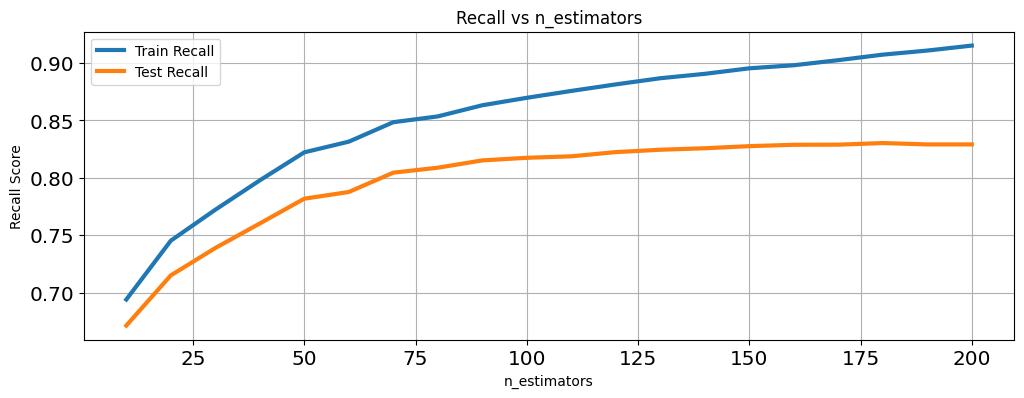

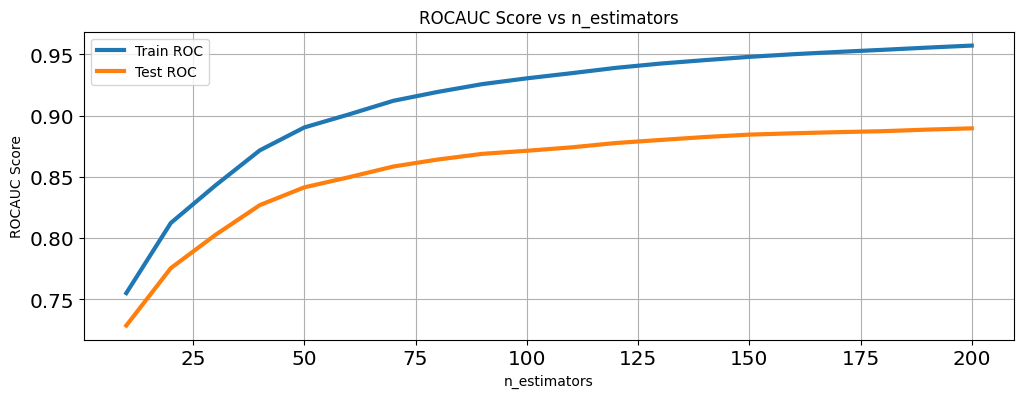

In [ ]:
n_estimators = [int(x) for x in np.linspace(10, 200, 20)]
draw_xgb_curve_n_estimators(n_estimators)

tidak ada perbedaan, tidak perlu tuning

### Learning Curve depth

In [ ]:
def draw_xgb_curve_depth(max_depth):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in max_depth:
        model = XGBClassifier(verbose=0, max_depth=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'max_depth: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(max_depth, train_recall_scores, label='Train Recall')
    plt.plot(max_depth, test_recall_scores, label='Test Recall')
    plt.xlabel('max_depth')
    plt.ylabel('Recall Score')
    plt.title('Recall vs max_depth')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(max_depth, train_roc_scores, label='Train ROC')
    plt.plot(max_depth, test_roc_scores, label='Test ROC')
    plt.xlabel('max_depth')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs max_depth')
    plt.legend()
    plt.grid(True)
    plt.show()

max_depth: 2; Recall Train: 0.6272, Test: 0.6078; ROCAUC Train: 0.6785, Test: 0.6600
max_depth: 3; Recall Train: 0.6781, Test: 0.6527; ROCAUC Train: 0.7416, Test: 0.7130
max_depth: 4; Recall Train: 0.7594, Test: 0.7295; ROCAUC Train: 0.8264, Test: 0.7863
max_depth: 6; Recall Train: 0.8696, Test: 0.8174; ROCAUC Train: 0.9305, Test: 0.8713
max_depth: 7; Recall Train: 0.9055, Test: 0.8264; ROCAUC Train: 0.9537, Test: 0.8905
max_depth: 9; Recall Train: 0.9794, Test: 0.8313; ROCAUC Train: 0.9718, Test: 0.9080
max_depth: 10; Recall Train: 0.9928, Test: 0.8329; ROCAUC Train: 0.9748, Test: 0.9136
max_depth: 12; Recall Train: 0.9996, Test: 0.8339; ROCAUC Train: 0.9801, Test: 0.9194
max_depth: 13; Recall Train: 0.9993, Test: 0.8337; ROCAUC Train: 0.9816, Test: 0.9203
max_depth: 15; Recall Train: 0.9992, Test: 0.8300; ROCAUC Train: 0.9837, Test: 0.9206


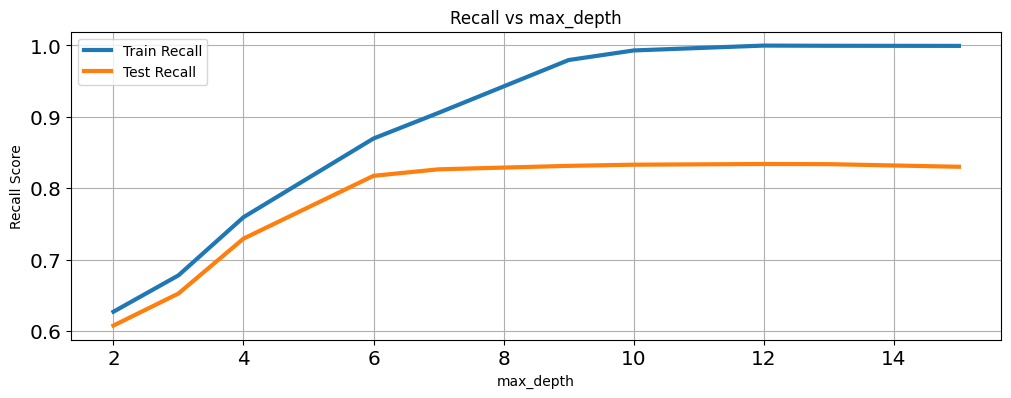

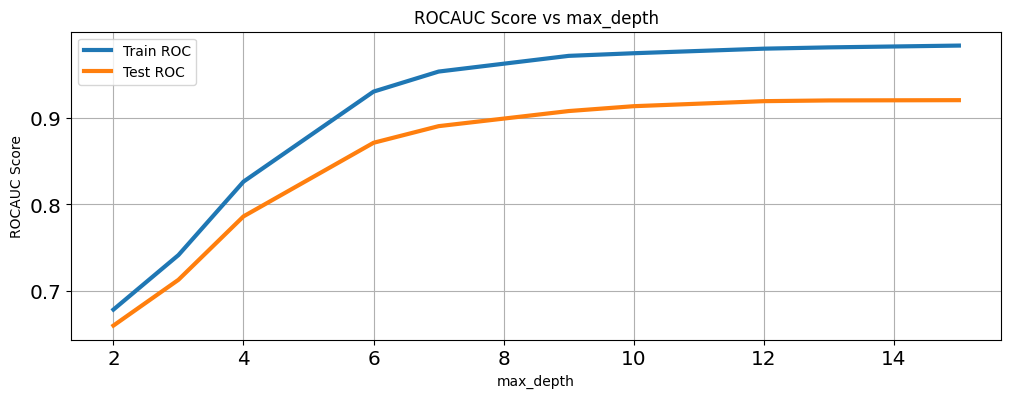

In [ ]:
max_depth = [int(x) for x in np.linspace(2, 15, 10)]
draw_xgb_curve_depth(max_depth)

depth = 6

### Learning Curve min_child_weight

In [ ]:
def draw_xgb_curve_min_child_weight(min_child_weight):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in min_child_weight:
        model = XGBClassifier(verbose=0, max_depth=6, min_child_weight=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'min_child_weight: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(min_child_weight, train_recall_scores, label='Train Recall')
    plt.plot(min_child_weight, test_recall_scores, label='Test Recall')
    plt.xlabel('min_child_weight')
    plt.ylabel('Recall Score')
    plt.title('Recall vs min_child_weight')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(min_child_weight, train_roc_scores, label='Train ROC')
    plt.plot(min_child_weight, test_roc_scores, label='Test ROC')
    plt.xlabel('min_child_weight')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs min_child_weight')
    plt.legend()
    plt.grid(True)
    plt.show()

min_child_weight: 1; Recall Train: 0.8696, Test: 0.8174; ROCAUC Train: 0.9305, Test: 0.8713
min_child_weight: 6; Recall Train: 0.8547, Test: 0.8154; ROCAUC Train: 0.9198, Test: 0.8667
min_child_weight: 11; Recall Train: 0.8527, Test: 0.8111; ROCAUC Train: 0.9162, Test: 0.8648
min_child_weight: 16; Recall Train: 0.8482, Test: 0.8154; ROCAUC Train: 0.9076, Test: 0.8605
min_child_weight: 21; Recall Train: 0.8414, Test: 0.8090; ROCAUC Train: 0.9064, Test: 0.8585
min_child_weight: 27; Recall Train: 0.8388, Test: 0.8072; ROCAUC Train: 0.8982, Test: 0.8529
min_child_weight: 32; Recall Train: 0.8366, Test: 0.7984; ROCAUC Train: 0.8960, Test: 0.8493
min_child_weight: 37; Recall Train: 0.8291, Test: 0.7999; ROCAUC Train: 0.8895, Test: 0.8468
min_child_weight: 42; Recall Train: 0.8251, Test: 0.7921; ROCAUC Train: 0.8874, Test: 0.8436
min_child_weight: 47; Recall Train: 0.8230, Test: 0.7910; ROCAUC Train: 0.8844, Test: 0.8403
min_child_weight: 53; Recall Train: 0.8164, Test: 0.7871; ROCAUC Train: 

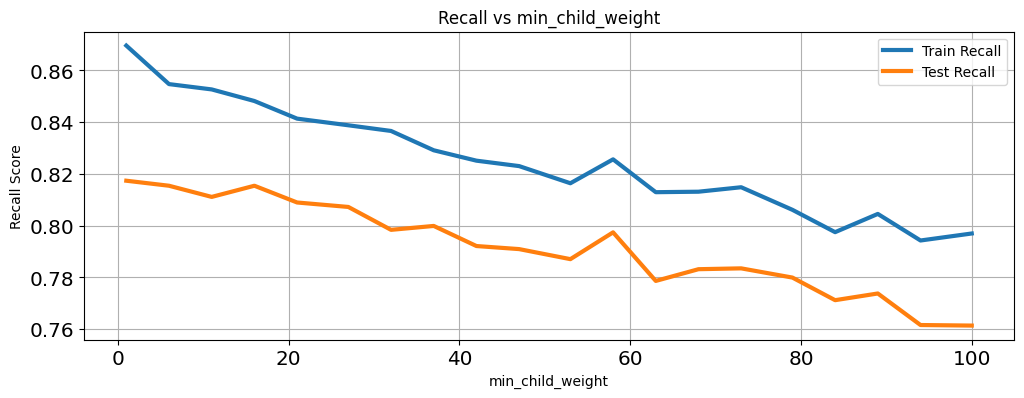

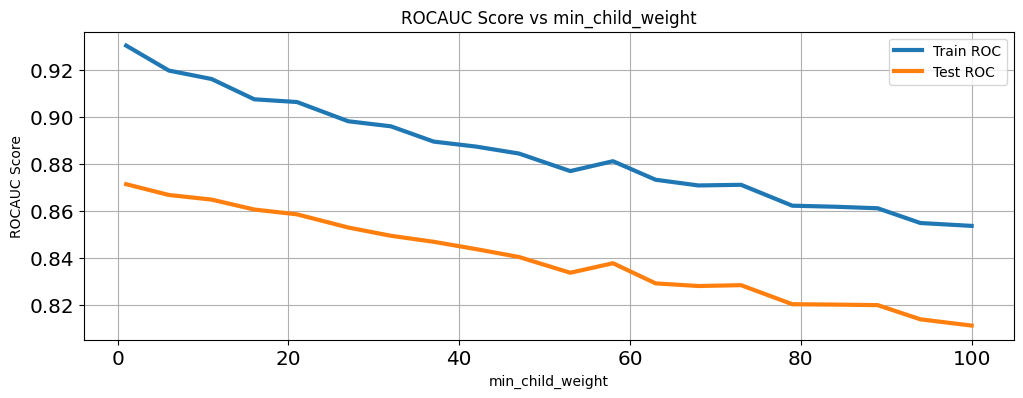

In [ ]:
min_child_weight = [int(x) for x in np.linspace(1, 100, 20)]
draw_xgb_curve_min_child_weight(min_child_weight)

min_child_weight tidak perlu tuning

### Learning Curve gamma

In [ ]:
def draw_xgb_curve_gamma(gamma):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in gamma:
        model = XGBClassifier(verbose=0, max_depth=6, gamma=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'gamma: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(gamma, train_recall_scores, label='Train Recall')
    plt.plot(gamma, test_recall_scores, label='Test Recall')
    plt.xlabel('gamma')
    plt.ylabel('Recall Score')
    plt.title('Recall vs gamma')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(gamma, train_roc_scores, label='Train ROC')
    plt.plot(gamma, test_roc_scores, label='Test ROC')
    plt.xlabel('gamma')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs gamma')
    plt.legend()
    plt.grid(True)
    plt.show()

gamma: 1; Recall Train: 0.8064, Test: 0.7695; ROCAUC Train: 0.8730, Test: 0.8279
gamma: 6; Recall Train: 0.7089, Test: 0.6906; ROCAUC Train: 0.7705, Test: 0.7430
gamma: 11; Recall Train: 0.6961, Test: 0.6786; ROCAUC Train: 0.7443, Test: 0.7174
gamma: 16; Recall Train: 0.6556, Test: 0.6319; ROCAUC Train: 0.7221, Test: 0.6963
gamma: 21; Recall Train: 0.6663, Test: 0.6504; ROCAUC Train: 0.7090, Test: 0.6880
gamma: 27; Recall Train: 0.6647, Test: 0.6485; ROCAUC Train: 0.6903, Test: 0.6731
gamma: 32; Recall Train: 0.6646, Test: 0.6490; ROCAUC Train: 0.6776, Test: 0.6624
gamma: 37; Recall Train: 0.6445, Test: 0.6343; ROCAUC Train: 0.6664, Test: 0.6537
gamma: 42; Recall Train: 0.6260, Test: 0.6098; ROCAUC Train: 0.6612, Test: 0.6480
gamma: 47; Recall Train: 0.6258, Test: 0.6118; ROCAUC Train: 0.6518, Test: 0.6399
gamma: 53; Recall Train: 0.6522, Test: 0.6393; ROCAUC Train: 0.6523, Test: 0.6383
gamma: 58; Recall Train: 0.6217, Test: 0.6089; ROCAUC Train: 0.6475, Test: 0.6346
gamma: 63; Recall 

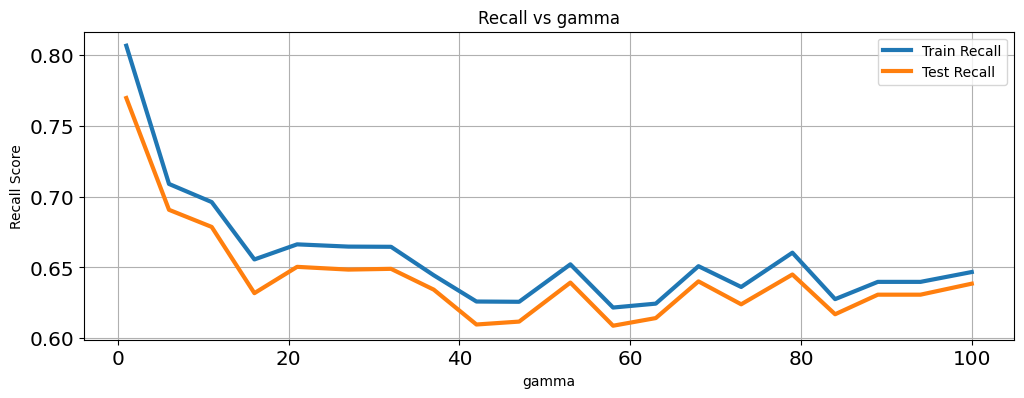

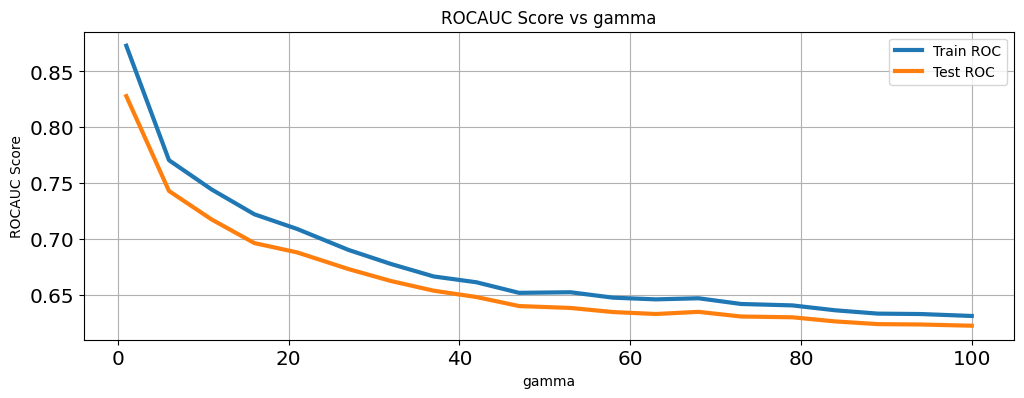

In [ ]:
gamma=  [int(x) for x in np.linspace(1, 100, 20)]
draw_xgb_curve_gamma(gamma)

gamma tidak perlu tuning

### Learning Curve subsample

In [ ]:
def draw_xgb_curve_subsample(subsample):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in subsample:
        model = XGBClassifier(verbose=0, max_depth=6, subsample=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'subsample: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(subsample, train_recall_scores, label='Train Recall')
    plt.plot(subsample, test_recall_scores, label='Test Recall')
    plt.xlabel('subsample')
    plt.ylabel('Recall Score')
    plt.title('Recall vs subsample')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(subsample, train_roc_scores, label='Train ROC')
    plt.plot(subsample, test_roc_scores, label='Test ROC')
    plt.xlabel('subsample')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs subsample')
    plt.legend()
    plt.grid(True)
    plt.show()

subsample: 0.2; Recall Train: 0.8353, Test: 0.7975; ROCAUC Train: 0.8947, Test: 0.8437
subsample: 0.2888888888888889; Recall Train: 0.8464, Test: 0.7999; ROCAUC Train: 0.9082, Test: 0.8545
subsample: 0.37777777777777777; Recall Train: 0.8555, Test: 0.8147; ROCAUC Train: 0.9173, Test: 0.8644
subsample: 0.4666666666666667; Recall Train: 0.8594, Test: 0.8107; ROCAUC Train: 0.9198, Test: 0.8635
subsample: 0.5555555555555556; Recall Train: 0.8614, Test: 0.8158; ROCAUC Train: 0.9250, Test: 0.8710
subsample: 0.6444444444444445; Recall Train: 0.8648, Test: 0.8150; ROCAUC Train: 0.9268, Test: 0.8680
subsample: 0.7333333333333334; Recall Train: 0.8681, Test: 0.8184; ROCAUC Train: 0.9278, Test: 0.8706
subsample: 0.8222222222222222; Recall Train: 0.8662, Test: 0.8151; ROCAUC Train: 0.9281, Test: 0.8698
subsample: 0.9111111111111112; Recall Train: 0.8731, Test: 0.8190; ROCAUC Train: 0.9313, Test: 0.8737
subsample: 1.0; Recall Train: 0.8696, Test: 0.8174; ROCAUC Train: 0.9305, Test: 0.8713


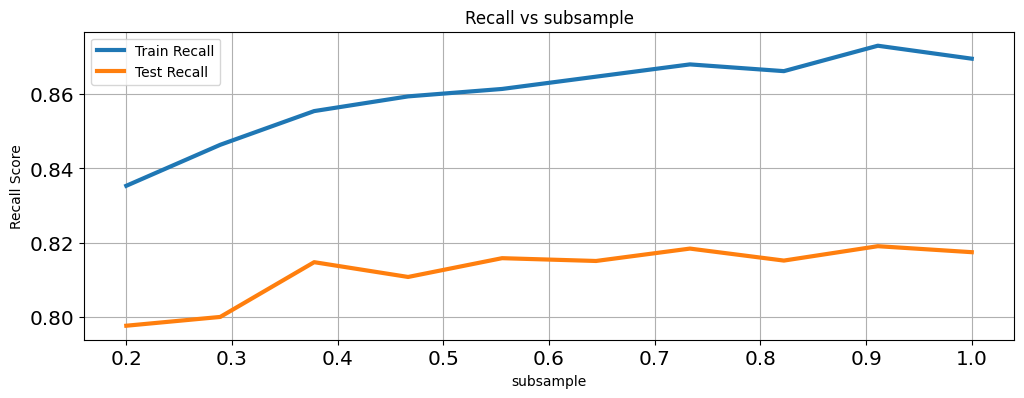

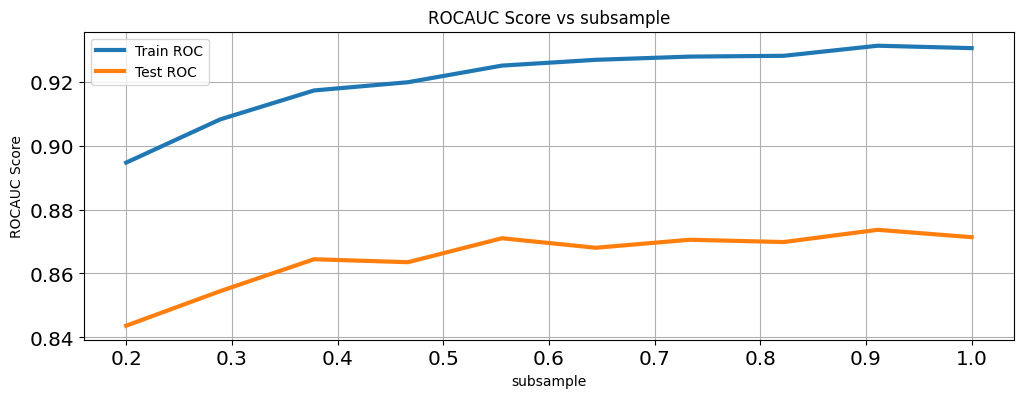

In [ ]:
subsample= np.linspace(0.2, 1, 10).tolist()
draw_xgb_curve_subsample(subsample)

subsumple = 1, sesuai tidak perlu tuning

### Learning Curve colsample_bytree

In [ ]:
def draw_xgb_curve_colsample_bytree(colsample_bytree):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in colsample_bytree:
        model = XGBClassifier(verbose=0, max_depth=6, colsample_bytree=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'colsample_bytree: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(colsample_bytree, train_recall_scores, label='Train Recall')
    plt.plot(colsample_bytree, test_recall_scores, label='Test Recall')
    plt.xlabel('colsample_bytree')
    plt.ylabel('Recall Score')
    plt.title('Recall vs colsample_bytree')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(colsample_bytree, train_roc_scores, label='Train ROC')
    plt.plot(colsample_bytree, test_roc_scores, label='Test ROC')
    plt.xlabel('colsample_bytree')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs colsample_bytree')
    plt.legend()
    plt.grid(True)
    plt.show()

colsample_bytree: 0.2; Recall Train: 0.7545, Test: 0.7211; ROCAUC Train: 0.8148, Test: 0.7724
colsample_bytree: 0.2888888888888889; Recall Train: 0.8170, Test: 0.7804; ROCAUC Train: 0.8688, Test: 0.8218
colsample_bytree: 0.37777777777777777; Recall Train: 0.8303, Test: 0.7859; ROCAUC Train: 0.8893, Test: 0.8368
colsample_bytree: 0.4666666666666667; Recall Train: 0.8457, Test: 0.7973; ROCAUC Train: 0.9121, Test: 0.8576
colsample_bytree: 0.5555555555555556; Recall Train: 0.8513, Test: 0.8050; ROCAUC Train: 0.9168, Test: 0.8622
colsample_bytree: 0.6444444444444445; Recall Train: 0.8579, Test: 0.8081; ROCAUC Train: 0.9209, Test: 0.8640
colsample_bytree: 0.7333333333333334; Recall Train: 0.8635, Test: 0.8152; ROCAUC Train: 0.9220, Test: 0.8653
colsample_bytree: 0.8222222222222222; Recall Train: 0.8621, Test: 0.8098; ROCAUC Train: 0.9223, Test: 0.8666
colsample_bytree: 0.9111111111111112; Recall Train: 0.8642, Test: 0.8121; ROCAUC Train: 0.9261, Test: 0.8690
colsample_bytree: 1.0; Recall Tra

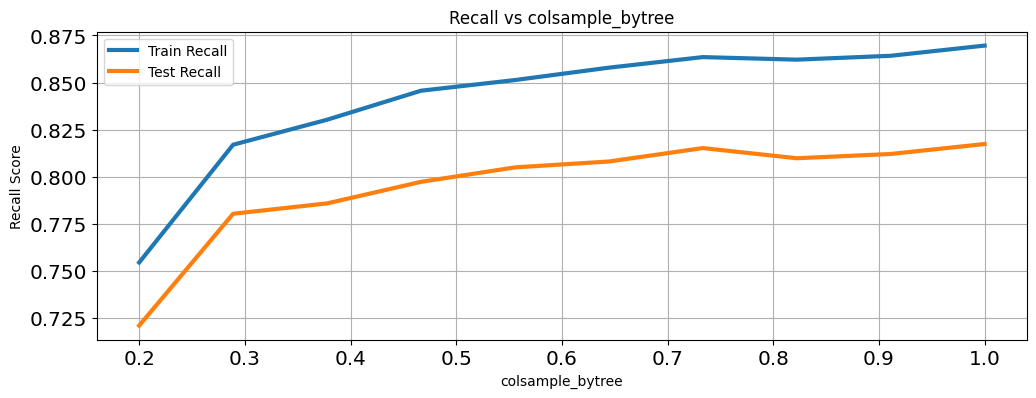

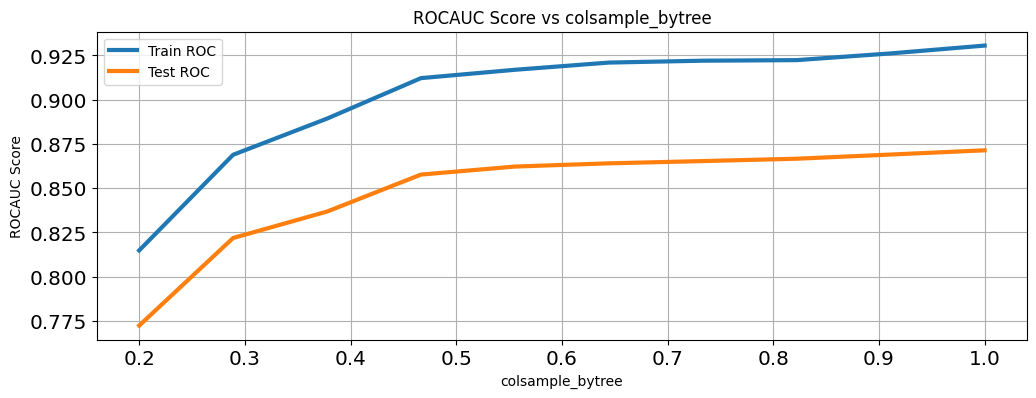

In [ ]:
colsample_bytree= np.linspace(0.2, 1, 10).tolist()
draw_xgb_curve_colsample_bytree(colsample_bytree)

colsample_bytree = 1, sesuai tidak perlu tuning

### Learning Curve reg_alpha

In [ ]:
def draw_xgb_curve_reg_alpha(reg_alpha):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in reg_alpha:
        model = XGBClassifier(verbose=0, max_depth=6, reg_alpha=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'reg_alpha: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(reg_alpha, train_recall_scores, label='Train Recall')
    plt.plot(reg_alpha, test_recall_scores, label='Test Recall')
    plt.xlabel('reg_alpha')
    plt.ylabel('Recall Score')
    plt.title('Recall vs reg_alpha')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(reg_alpha, train_roc_scores, label='Train ROC')
    plt.plot(reg_alpha, test_roc_scores, label='Test ROC')
    plt.xlabel('reg_alpha')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs reg_alpha')
    plt.legend()
    plt.grid(True)
    plt.show()

reg_alpha: 1; Recall Train: 0.8700, Test: 0.8190; ROCAUC Train: 0.9294, Test: 0.8709
reg_alpha: 6; Recall Train: 0.8572, Test: 0.8202; ROCAUC Train: 0.9208, Test: 0.8709
reg_alpha: 11; Recall Train: 0.8456, Test: 0.8106; ROCAUC Train: 0.9109, Test: 0.8623
reg_alpha: 16; Recall Train: 0.8334, Test: 0.7964; ROCAUC Train: 0.8999, Test: 0.8548
reg_alpha: 21; Recall Train: 0.8271, Test: 0.7960; ROCAUC Train: 0.8908, Test: 0.8469
reg_alpha: 27; Recall Train: 0.8210, Test: 0.7901; ROCAUC Train: 0.8804, Test: 0.8390
reg_alpha: 32; Recall Train: 0.7967, Test: 0.7600; ROCAUC Train: 0.8551, Test: 0.8131
reg_alpha: 37; Recall Train: 0.7585, Test: 0.7279; ROCAUC Train: 0.8281, Test: 0.7915
reg_alpha: 42; Recall Train: 0.7293, Test: 0.7006; ROCAUC Train: 0.7934, Test: 0.7584
reg_alpha: 47; Recall Train: 0.7123, Test: 0.6894; ROCAUC Train: 0.7778, Test: 0.7460
reg_alpha: 53; Recall Train: 0.6730, Test: 0.6526; ROCAUC Train: 0.7412, Test: 0.7121
reg_alpha: 58; Recall Train: 0.6715, Test: 0.6531; ROCAU

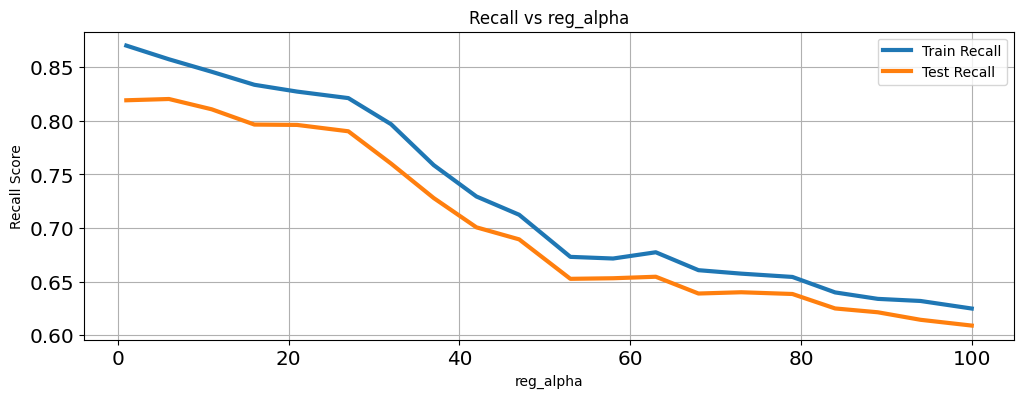

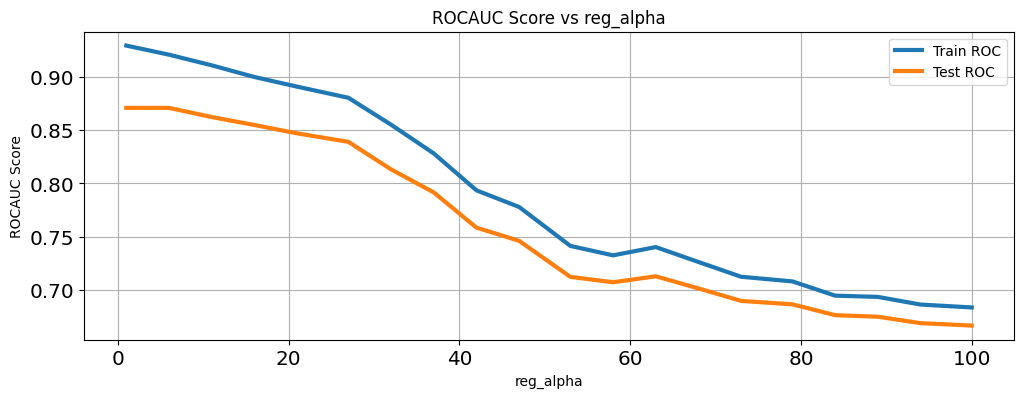

In [ ]:
reg_alpha=  [int(x) for x in np.linspace(1, 100, 20)]
draw_xgb_curve_reg_alpha(reg_alpha)

reg_alpha tidak perlu tuning

### Learning Curve reg_lambda

In [ ]:
def draw_xgb_curve_reg_lambda(reg_lambda):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in reg_lambda:
        model = XGBClassifier(verbose=0, max_depth=6, reg_lambda=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'reg_lambda: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(reg_lambda, train_recall_scores, label='Train Recall')
    plt.plot(reg_lambda, test_recall_scores, label='Test Recall')
    plt.xlabel('reg_lambda')
    plt.ylabel('Recall Score')
    plt.title('Recall vs reg_lambda')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(reg_lambda, train_roc_scores, label='Train ROC')
    plt.plot(reg_lambda, test_roc_scores, label='Test ROC')
    plt.xlabel('reg_lambda')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs reg_lambda')
    plt.legend()
    plt.grid(True)
    plt.show()



reg_lambda: 1; Recall Train: 0.8696, Test: 0.8174; ROCAUC Train: 0.9305, Test: 0.8713
reg_lambda: 6; Recall Train: 0.8594, Test: 0.8139; ROCAUC Train: 0.9221, Test: 0.8689
reg_lambda: 11; Recall Train: 0.8507, Test: 0.8107; ROCAUC Train: 0.9180, Test: 0.8670
reg_lambda: 16; Recall Train: 0.8515, Test: 0.8157; ROCAUC Train: 0.9136, Test: 0.8659
reg_lambda: 21; Recall Train: 0.8444, Test: 0.8089; ROCAUC Train: 0.9077, Test: 0.8597
reg_lambda: 27; Recall Train: 0.8318, Test: 0.7992; ROCAUC Train: 0.9025, Test: 0.8566
reg_lambda: 32; Recall Train: 0.8381, Test: 0.7968; ROCAUC Train: 0.9032, Test: 0.8542
reg_lambda: 37; Recall Train: 0.8357, Test: 0.8027; ROCAUC Train: 0.9011, Test: 0.8544
reg_lambda: 42; Recall Train: 0.8317, Test: 0.8016; ROCAUC Train: 0.8959, Test: 0.8510
reg_lambda: 47; Recall Train: 0.8324, Test: 0.8012; ROCAUC Train: 0.8962, Test: 0.8509
reg_lambda: 53; Recall Train: 0.8340, Test: 0.8030; ROCAUC Train: 0.8949, Test: 0.8490
reg_lambda: 58; Recall Train: 0.8326, Test: 0

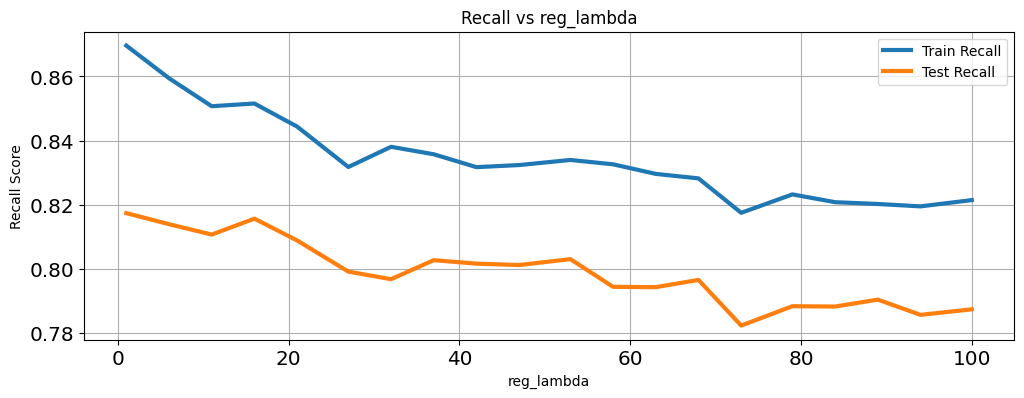

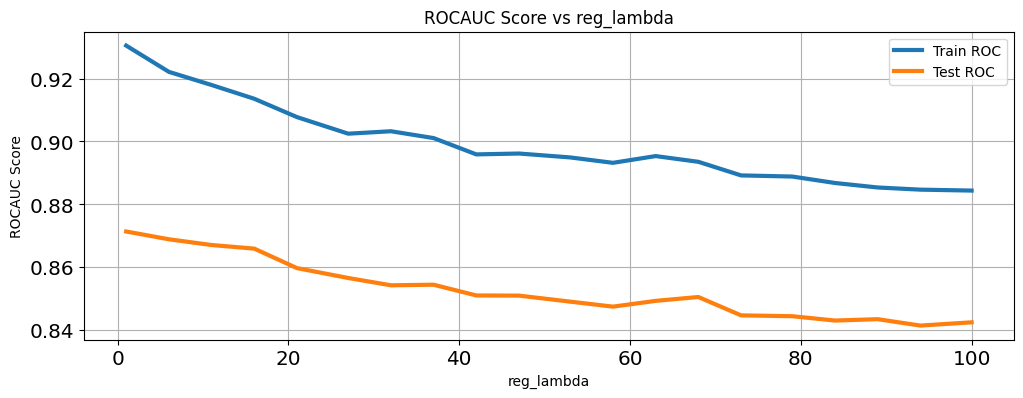

In [ ]:
reg_lambda=  [int(x) for x in np.linspace(1, 100, 20)]
draw_xgb_curve_reg_lambda(reg_lambda)

tidak perlu tuning

### Learning Curve learning_rate

In [ ]:
def draw_xgb_curve_learning_rate(learning_rate):
    train_recall_scores = []
    test_recall_scores = []
    train_roc_scores = []
    test_roc_scores = []

    for i in learning_rate:
        model = XGBClassifier(verbose=0, max_depth=6, learning_rate=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

        # Recall
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        train_recall_scores.append(train_recall)
        test_recall_scores.append(test_recall)

        # ROCAUC-score
        train_roc = roc_auc_score(y_train, y_pred_proba_train)
        test_roc = roc_auc_score(y_test, y_pred_proba_test)
        train_roc_scores.append(train_roc)
        test_roc_scores.append(test_roc)

        print(f'learning_rate: {i:}; Recall Train: {train_recall:.4f}, Test: {test_recall:.4f}; '
              f'ROCAUC Train: {train_roc:.4f}, Test: {test_roc:.4f}')

    # Plot Recall
    plt.figure()
    plt.plot(learning_rate, train_recall_scores, label='Train Recall')
    plt.plot(learning_rate, test_recall_scores, label='Test Recall')
    plt.xlabel('learning_rate')
    plt.ylabel('Recall Score')
    plt.title('Recall vs learning_rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC-score
    plt.figure()
    plt.plot(learning_rate, train_roc_scores, label='Train ROC')
    plt.plot(learning_rate, test_roc_scores, label='Test ROC')
    plt.xlabel('learning_rate')
    plt.ylabel('ROCAUC Score')
    plt.title('ROCAUC Score vs learning_rate')
    plt.legend()
    plt.grid(True)
    plt.show()

learning_rate: 0.01; Recall Train: 0.6929, Test: 0.6675; ROCAUC Train: 0.7307, Test: 0.7058
learning_rate: 0.08666666666666666; Recall Train: 0.7944, Test: 0.7557; ROCAUC Train: 0.8600, Test: 0.8166
learning_rate: 0.16333333333333333; Recall Train: 0.8353, Test: 0.7873; ROCAUC Train: 0.9007, Test: 0.8502
learning_rate: 0.24; Recall Train: 0.8549, Test: 0.8094; ROCAUC Train: 0.9207, Test: 0.8642
learning_rate: 0.31666666666666665; Recall Train: 0.8696, Test: 0.8109; ROCAUC Train: 0.9302, Test: 0.8707
learning_rate: 0.3933333333333333; Recall Train: 0.8833, Test: 0.8248; ROCAUC Train: 0.9394, Test: 0.8756
learning_rate: 0.47; Recall Train: 0.8981, Test: 0.8287; ROCAUC Train: 0.9460, Test: 0.8797
learning_rate: 0.5466666666666666; Recall Train: 0.9061, Test: 0.8350; ROCAUC Train: 0.9502, Test: 0.8811
learning_rate: 0.6233333333333333; Recall Train: 0.9149, Test: 0.8380; ROCAUC Train: 0.9537, Test: 0.8829
learning_rate: 0.7; Recall Train: 0.9202, Test: 0.8375; ROCAUC Train: 0.9570, Test: 0

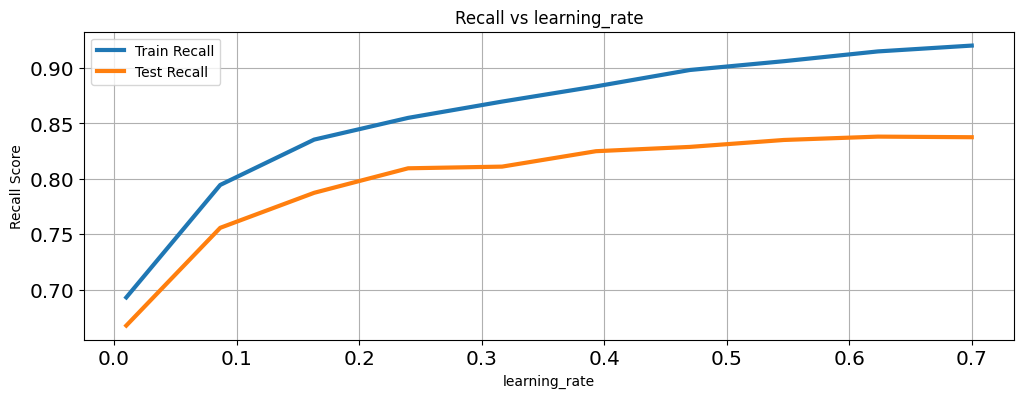

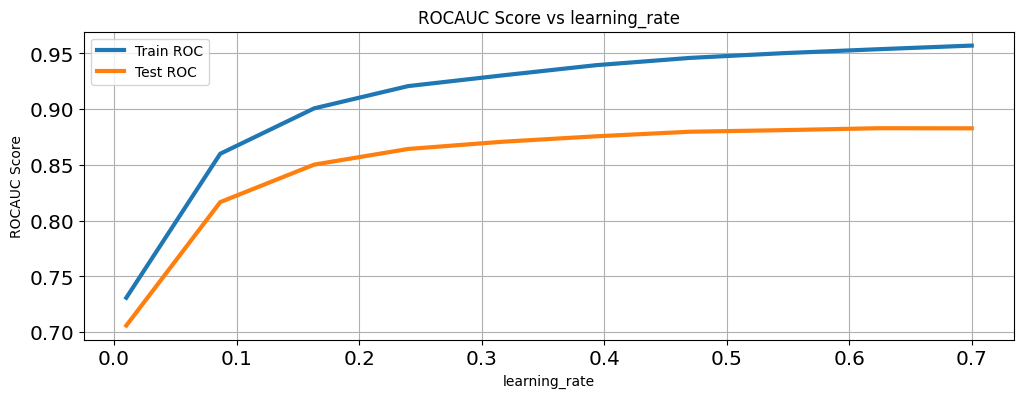

In [ ]:
learning_rate = np.linspace(0.01, 0.7, 10).tolist()
draw_xgb_curve_learning_rate(learning_rate)

learning_rate  = 0.546

## Xgboost After Tuning

In [69]:
xgb_tuning = XGBClassifier(verbose=0,learning_rate=0.546, random_state=42)

print(f'Evaluate model: XGBClassifier setelah tuning')
eval_classification_single(xgb_tuning)

Evaluate model: XGBClassifier setelah tuning
Recall (Train Set): 0.90
Recall (Test Set): 0.83
ROC-AUC (Train Set): 0.95
ROC-AUC (Test Set): 0.88
Recall (crossval train): 0.91
Recall (crossval test): 0.83


In [70]:
xgb_tuning.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.546,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'verbose': 0}

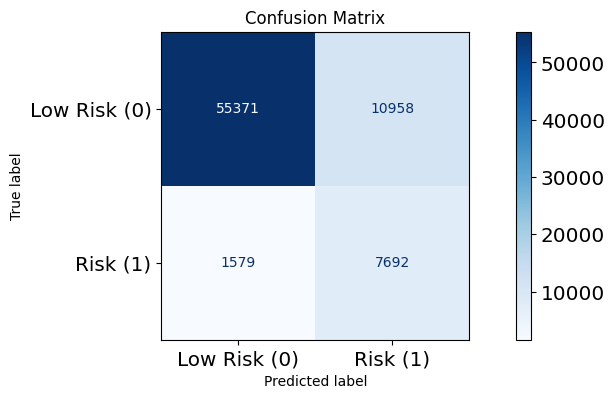

In [71]:
plot_confusion_matrix_and_metrics(xgb_tuning)

In [72]:
analyze_fp_fn_balance(xgb_tuning)

True Positives (TP): 7692 (10.17%)
True Negatives (TN): 55371 (73.24%)
False Positives (FP): 10958 (14.49%)
False Negatives (FN): 1579 (2.09%)

üîÅ Balance between FP and FN (0 = perfect balance, 1 = completely unbalanced): 0.75


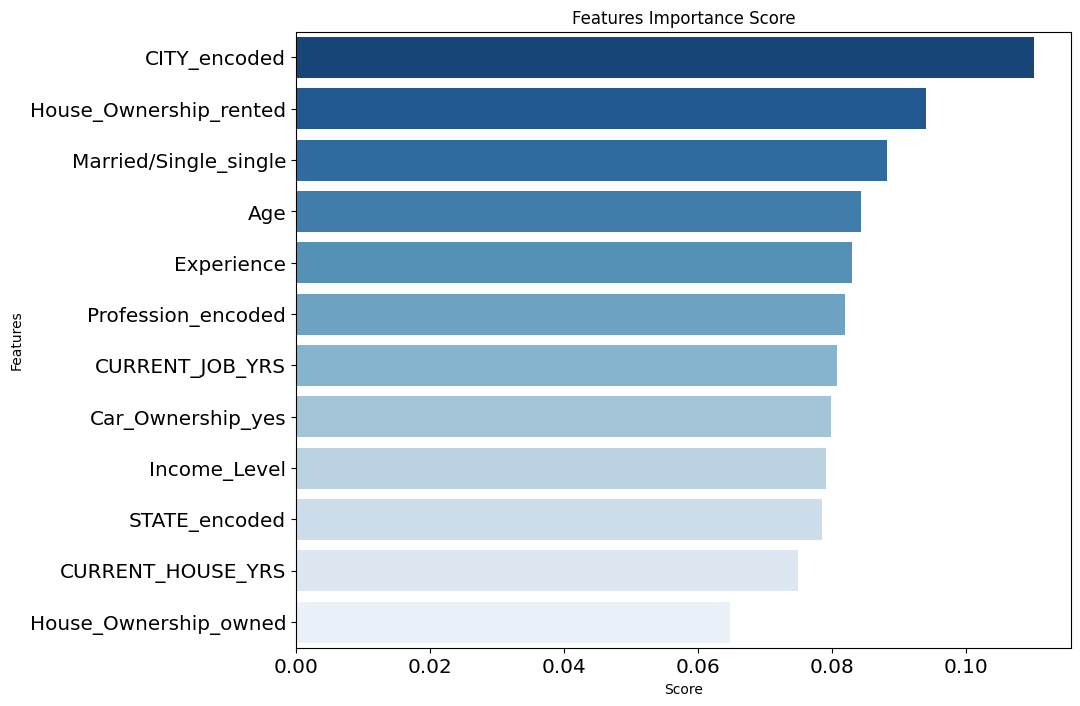

In [79]:
show_feature_importance(xgb_tuning)

In [ ]:
feat_importances = pd.Series(xgb_tuning.feature_importances_, index=X_test.columns)
feat_importances

Age                       0.084295
Experience                0.082953
CURRENT_JOB_YRS           0.080755
CURRENT_HOUSE_YRS         0.074946
Income_Level              0.079173
Car_Ownership_yes         0.079854
Married/Single_single     0.088314
House_Ownership_owned     0.064873
House_Ownership_rented    0.094005
Profession_encoded        0.082025
STATE_encoded             0.078616
CITY_encoded              0.110192
dtype: float32

# SHAP

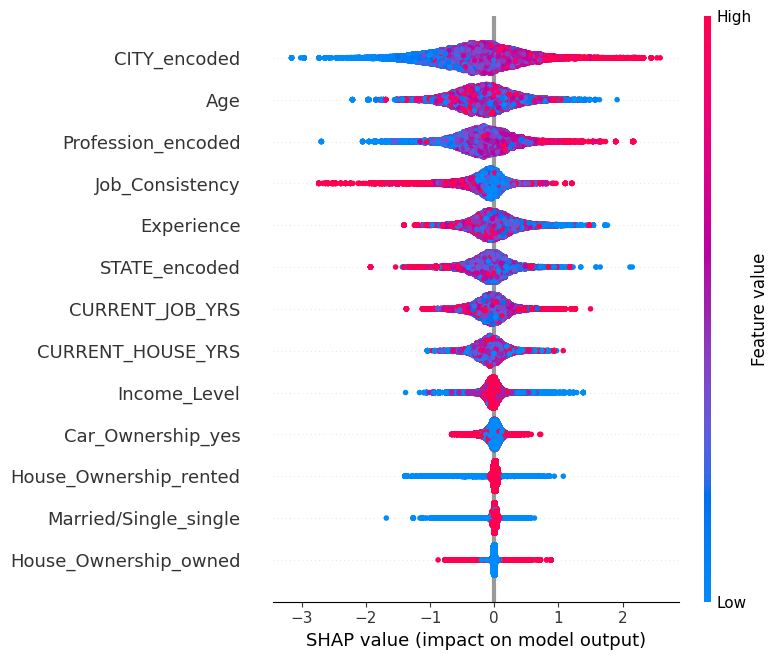

In [ ]:
import shap

explainer = shap.Explainer(xgb_tuning)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


# Result

In [ ]:
xgb_tuning = XGBClassifier(verbose=0,learning_rate=0.546, max_depth=6, subsample=1,colsample_bytree=1, random_state=42)
xgb_tuning.fit(X_train, y_train)
y_pred = xgb_tuning.predict(X_test)
X_test_before['Risk_Flag_Predicted'] = y_pred


In [ ]:
X_test_before

Age  Experience                  Profession          CITY  \
75255    47          18                  Politician      Hindupur   
192435   44           2  Computer_hardware_engineer  Narasaraopet   
154839   55           9          Software_Developer         Patna   
59774    61          20                    Comedian        Haldia   
63788    78          13                Web_designer    Coimbatore   
...     ...         ...                         ...           ...   
148446   37          18                        Chef      Shivpuri   
208441   58          17        Chartered_Accountant     Alappuzha   
137796   33           2                Army_officer       Shimoga   
34679    57          12                    Engineer    Kadapa[23]   
140529   22           7                   Scientist      Srinagar   

                    STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Income_Level  \
75255      Andhra_Pradesh                7                 13             3   
192435     Andhra_Pradesh                2                 10             3   
154839              Bihar                9                 13             3   
59774         West_Bengal                8                 11             3   
63788          Tamil_Nadu                9                 12             2   
...                   ...              ...                ...           ...   
148446     Madhya_Pradesh                5                 10             3   
208441             Kerala               10                 10             2   
137796          Karnataka                2                 13             3   
34679      Andhra_Pradesh               12                 10             3   
140529  Jammu_and_Kashmir                7                 12             3   

        Car_Ownership_yes  Married/Single_single  House_Ownership_owned  \
75255               False                   True                  False   
192435              False                   True                  False   
154839              False                   True                  False   
59774               False                   True                  False   
63788               False                   True                  False   
...                   ...                    ...                    ...   
148446              False                   True                  False   
208441              False                   True                  False   
137796              False                   True                  False   
34679               False                   True                  False   
140529              False                   True                  False   

        House_Ownership_rented  Risk_Flag_Predicted  
75255                     True                    0  
192435                    True                    0  
154839                    True                    0  
59774                     True                    0  
63788                     True                    0  
...                        ...                  ...  
148446                    True                    0  
208441                    True                    0  
137796                    True                    0  
34679                     True                    1  
140529                    True                    1  

[75600 rows x 13 columns]

In [ ]:
X_test_before.shape

(75600, 13)

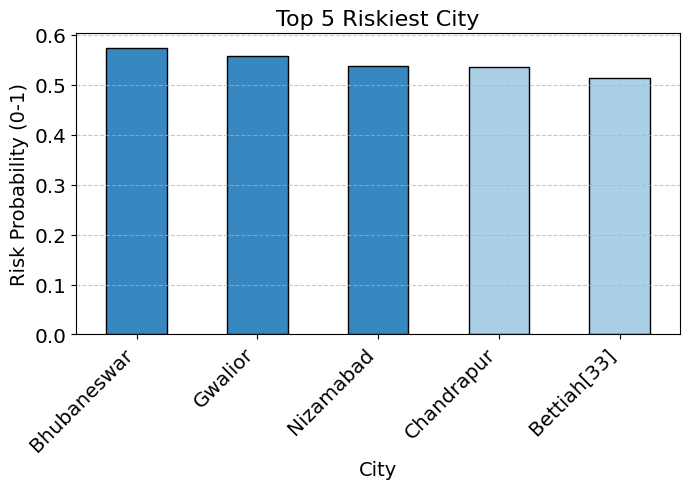

In [ ]:
# Top 5 Risky City
risk_by_state = X_test_before.groupby('CITY')['Risk_Flag_Predicted'].mean().sort_values(ascending=False)
colors = sns.color_palette("Blues")
top_risky_state = risk_by_state.head(5)

plt.figure(figsize=(7,5))
top_risky_state.plot(kind='bar', color=bar_colors, edgecolor='black')
plt.title('Top 5 Riskiest City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Risk Probability (0-1)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

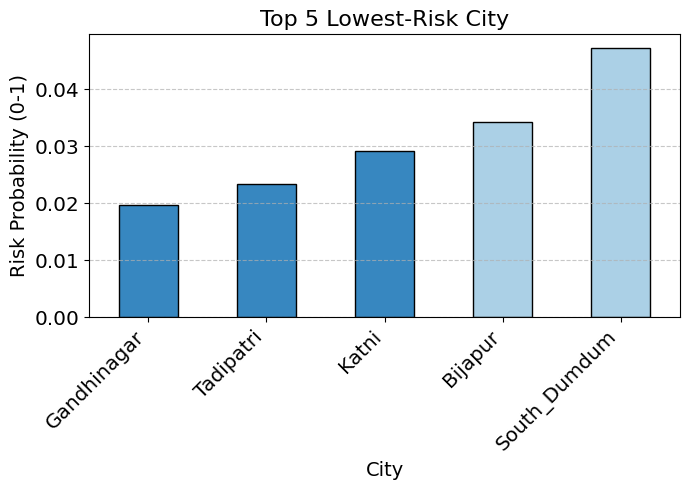

In [ ]:
# Top 5 Lowest Risk City
risk_by_state = X_test_before.groupby('CITY')['Risk_Flag_Predicted'].mean().sort_values(ascending=True)
colors = sns.color_palette("Blues")
top_risky_state = risk_by_state.head(5)

plt.figure(figsize=(7,5))
top_risky_state.plot(kind='bar', color=bar_colors, edgecolor='black')
plt.title('Top 5 Lowest-Risk City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Risk Probability (0-1)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
X_test_before['Married/Single_single'] = X_test_before['Married/Single_single'].map({True: 'Single', False: 'Married'})

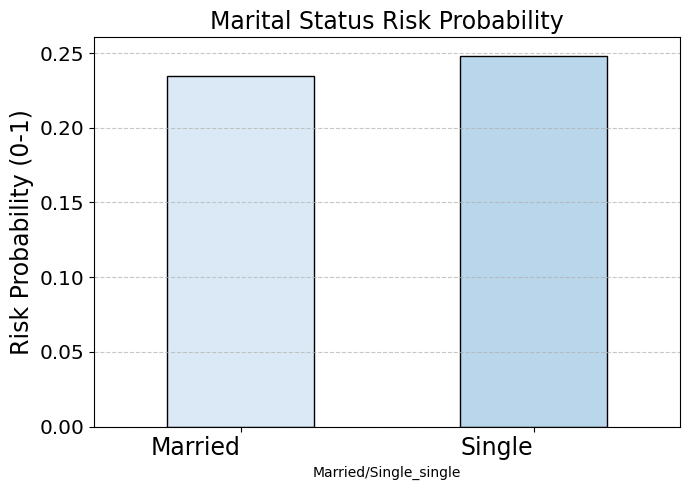

In [ ]:
risk_bystatus = X_test_before.groupby('Married/Single_single')['Risk_Flag_Predicted'].mean()
colors = sns.color_palette("Blues")

plt.figure(figsize=(7,5))
risk_bystatus.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Marital Status Risk Probability', fontsize=17)
plt.ylabel('Risk Probability (0-1)', fontsize=17)
plt.xticks(rotation=0, ha='right',fontsize=17)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
risk_bystatus = final_result.groupby('Married/Single_single')['Risk_Flag_Predicted'].mean()

# Risk Category

In [ ]:
X_test_before

Age  Experience                  Profession          CITY  \
75255    47          18                  Politician      Hindupur   
192435   44           2  Computer_hardware_engineer  Narasaraopet   
154839   55           9          Software_Developer         Patna   
59774    61          20                    Comedian        Haldia   
63788    78          13                Web_designer    Coimbatore   
...     ...         ...                         ...           ...   
148446   37          18                        Chef      Shivpuri   
208441   58          17        Chartered_Accountant     Alappuzha   
137796   33           2                Army_officer       Shimoga   
34679    57          12                    Engineer    Kadapa[23]   
140529   22           7                   Scientist      Srinagar   

                    STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Income_Level  \
75255      Andhra_Pradesh                7                 13             3   
192435     Andhra_Pradesh                2                 10             3   
154839              Bihar                9                 13             3   
59774         West_Bengal                8                 11             3   
63788          Tamil_Nadu                9                 12             2   
...                   ...              ...                ...           ...   
148446     Madhya_Pradesh                5                 10             3   
208441             Kerala               10                 10             2   
137796          Karnataka                2                 13             3   
34679      Andhra_Pradesh               12                 10             3   
140529  Jammu_and_Kashmir                7                 12             3   

        Car_Ownership_yes Married/Single_single  House_Ownership_owned  \
75255               False                Single                  False   
192435              False                Single                  False   
154839              False                Single                  False   
59774               False                Single                  False   
63788               False                Single                  False   
...                   ...                   ...                    ...   
148446              False                Single                  False   
208441              False                Single                  False   
137796              False                Single                  False   
34679               False                Single                  False   
140529              False                Single                  False   

        House_Ownership_rented  Risk_Flag_Predicted  
75255                     True                    0  
192435                    True                    0  
154839                    True                    0  
59774                     True                    0  
63788                     True                    0  
...                        ...                  ...  
148446                    True                    0  
208441                    True                    0  
137796                    True                    0  
34679                     True                    1  
140529                    True                    1  

[75600 rows x 13 columns]

In [ ]:
def analyze_risk_categories(model,filter_need_review=False):

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probability of class 1 (risky)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Copy test data and add true labels and predicted probability
    result_df = X_test_before.copy()
    result_df['True_Label'] = y_test
    result_df['Probability'] = y_proba

    # Risk categorization logic
    def categorize(prob):
        if prob <= 0.3:
            return 'Not Risk'
        elif prob <= 0.6:
            return 'Need Review'
        else:
            return 'Risk'

    result_df['Risk_Category'] = result_df['Probability'].apply(categorize)

    # Optional filter
    if filter_need_review:
        result_df = result_df[result_df['Risk_Category'] == 'Need Review']

    return result_df

In [ ]:
# All test results with risk category
full_result = analyze_risk_categories(xgb_tuning)
full_result

Age  Experience                  Profession          CITY  \
75255    47          18                  Politician      Hindupur   
192435   44           2  Computer_hardware_engineer  Narasaraopet   
154839   55           9          Software_Developer         Patna   
59774    61          20                    Comedian        Haldia   
63788    78          13                Web_designer    Coimbatore   
...     ...         ...                         ...           ...   
148446   37          18                        Chef      Shivpuri   
208441   58          17        Chartered_Accountant     Alappuzha   
137796   33           2                Army_officer       Shimoga   
34679    57          12                    Engineer    Kadapa[23]   
140529   22           7                   Scientist      Srinagar   

                    STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Income_Level  \
75255      Andhra_Pradesh                7                 13             3   
192435     Andhra_Pradesh                2                 10             3   
154839              Bihar                9                 13             3   
59774         West_Bengal                8                 11             3   
63788          Tamil_Nadu                9                 12             2   
...                   ...              ...                ...           ...   
148446     Madhya_Pradesh                5                 10             3   
208441             Kerala               10                 10             2   
137796          Karnataka                2                 13             3   
34679      Andhra_Pradesh               12                 10             3   
140529  Jammu_and_Kashmir                7                 12             3   

        Car_Ownership_yes Married/Single_single  House_Ownership_owned  \
75255               False                Single                  False   
192435              False                Single                  False   
154839              False                Single                  False   
59774               False                Single                  False   
63788               False                Single                  False   
...                   ...                   ...                    ...   
148446              False                Single                  False   
208441              False                Single                  False   
137796              False                Single                  False   
34679               False                Single                  False   
140529              False                Single                  False   

        House_Ownership_rented  Risk_Flag_Predicted  True_Label  Probability  \
75255                     True                    0           0     0.473796   
192435                    True                    0           0     0.199207   
154839                    True                    0           0     0.080740   
59774                     True                    0           0     0.236940   
63788                     True                    0           0     0.165392   
...                        ...                  ...         ...          ...   
148446                    True                    0           0     0.018654   
208441                    True                    0           0     0.019038   
137796                    True                    0           0     0.069731   
34679                     True                    1           1     0.761200   
140529                    True                    1           1     0.921895   

       Risk_Category  
75255    Need Review  
192435      Not Risk  
154839      Not Risk  
59774       Not Risk  
63788       Not Risk  
...              ...  
148446      Not Risk  
208441      Not Risk  
137796      Not Risk  
34679           Risk  
140529          Risk  

[75600 rows x 16 columns]

In [ ]:
full_result.value_counts('Risk_Category')

Risk_Category
Not Risk       47024
Risk           16034
Need Review    12542
Name: count, dtype: int64

In [ ]:
need_review_only = analyze_risk_categories(xgb_tuning, filter_need_review=True)
need_review_only

Age  Experience           Profession            CITY           STATE  \
75255    47          18           Politician        Hindupur  Andhra_Pradesh   
235462   49          13     Fashion_Designer           Korba    Chhattisgarh   
28320    29           0           Technician     Yamunanagar         Haryana   
56833    31           6       Civil_engineer          Mumbai     Maharashtra   
249828   66           6        Hotel_Manager       Kamarhati     West_Bengal   
...     ...         ...                  ...             ...             ...   
82716    53           5      Design_Engineer       Berhampur          Odisha   
132269   55           7               Artist        Hindupur  Andhra_Pradesh   
123720   35          15            Physician  Tadepalligudem  Andhra_Pradesh   
177483   57           3     Technical_writer     Kurnool[18]  Andhra_Pradesh   
229612   47           7  Biomedical_Engineer       Eluru[25]  Andhra_Pradesh   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Income_Level  Car_Ownership_yes  \
75255                 7                 13             3              False   
235462               13                 14             3              False   
28320                 0                 12             3              False   
56833                 6                 10             3              False   
249828                6                 11             1               True   
...                 ...                ...           ...                ...   
82716                 5                 14             3              False   
132269                7                 12             2              False   
123720                5                 13             3              False   
177483                3                 12             3              False   
229612                7                 11             2               True   

       Married/Single_single  House_Ownership_owned  House_Ownership_rented  \
75255                 Single                  False                    True   
235462                Single                  False                    True   
28320                 Single                  False                    True   
56833                 Single                  False                    True   
249828                Single                  False                    True   
...                      ...                    ...                     ...   
82716                 Single                  False                    True   
132269                Single                  False                    True   
123720                Single                  False                    True   
177483                Single                   True                   False   
229612                Single                  False                    True   

        Risk_Flag_Predicted  True_Label  Probability Risk_Category  
75255                     0           0     0.473796   Need Review  
235462                    0           0     0.321735   Need Review  
28320                     0           0     0.449848   Need Review  
56833                     0           0     0.307279   Need Review  
249828                    1           0     0.594305   Need Review  
...                     ...         ...          ...           ...  
82716                     0           0     0.437821   Need Review  
132269                    0           0     0.491644   Need Review  
123720                    0           0     0.350879   Need Review  
177483                    1           1     0.523536   Need Review  
229612                    1           1     0.586782   Need Review  

[12542 rows x 16 columns]

In [ ]:
need_review_only.shape

(12542, 16)

# Business Impact

Parameter business impact setelah penerapan machine learning berdasarkan:
* Approval Rate Optimization
* Assessment Rate Increase
* Non-Performing Loan (NPL) Reduction Rate
* Cycle Time Optimization

Perhitungan business impact menggunakan asumsi:
1. Perusahaan memiliki 150 credit analyst staff
2. Credit Analyst mampu menangani maksimal 15 personal loan application/day secara manual
3. Personal loan application mencapai 75600/month

In [ ]:
ca_sum = 150
ca_perday = 15
Loanapp_permonth = 75600

In [ ]:
TN = 55371
FN = 1579
FP = 10958
TP = 7692

In [ ]:
risk = 16304
need_review = 12542
not_risk = 47024

## Assessment Rate Increase

In [ ]:
# Total Monthly Capacity without ML
month_cap = ca_sum * ca_perday * 22
print(f'Total Monthly Capacity: {month_cap}')

# Percentage of loan applications that can be handled in one month wihout ML
handled_month = (month_cap / Loanapp_permonth)*100
print(f'Percentage of loan applications that can be handled in one month: {handled_month}')

Total Monthly Capacity: 49500
Percentage of loan applications that can be handled in one month: 65.47619047619048


In [ ]:
#After Implementing ML
Rate_Increase = round(((100 - handled_month)/handled_month*100),2)
print(f"Assessment Rate Increasing in {Rate_Increase}%")

Assessment Rate Increasing in 52.73%


## Cycle Time Reduction

In [ ]:
# Total Daily Capacity
day_cap = ca_sum * ca_perday
print(f'Total Daily Capacity: {day_cap}')

# Total workdays needed to process 75600 Loan manually
workdays = round((Loanapp_permonth / day_cap),2)
print(f'Total workdays needed to process 75600 loans manually: {workdays}')

# Total workdays needed to process 75600 Loan after ML
workdays_after = round((need_review / day_cap),2)
print(f'Total workdays needed to process 75600 loans after ML: {workdays_after}')

# Time Reduction
reduction = round((workdays-workdays_after)/workdays*100,2)
print(f'Time Reduction in {reduction}%')

Total Daily Capacity: 2250
Total workdays needed to process 75600 loans manually: 33.6
Total workdays needed to process 75600 loans after ML: 5.57
Time Reduction in 83.42%


## Approval Rate Optimization

In [ ]:
# In India, the average loan approval rate is 79%
app_rate_before = 0.79*month_cap
print(f'Total Approved Loan before implemented ML: {app_rate_before}')

# After Implemented
app_rate_after = TN+FN
print(f'Total Approved Loan after implemented ML: {app_rate_after}')

#Optimization
opt = round((app_rate_after-app_rate_before)/app_rate_before*100,2)
print(f'Approval Rate Optimization in {opt}%')

Total Approved Loan before implemented ML: 39105.0
Total Approved Loan after implemented ML: 56950
Approval Rate Optimization in 45.63%


## Non-Performing Loan Reduction Rate

In [ ]:
# Manual non-performing rate (industry average) is around 5%
totalnonper_before = 0.05*month_cap
non_per_rate_before = 5
print(f'Total Non-Performing Loan before implemented ML: {totalnonper_before}')
print(f'Presentase Non-Performing Loan before implemented ML: 5%')

# Non-performing rate after implemented ML
totalnonper_after = FN
non_per_rate_after = round(FN/(FN+TN+FP+TP)*100,2)
print(f'Total Non-Performing Loan after implemented ML: {totalnonper_after}')
print(f'Presentase Non-Performing Loan after implemented ML: {non_per_rate_after}%')

# Non-Performing Loan Reduction Rate
Reduc_rate = round((non_per_rate_before-non_per_rate_after)/non_per_rate_before*100,2)
print(f'Non-Performing Loan Reduction Rate in {Reduc_rate}%')

Total Non-Performing Loan before implemented ML: 2475.0
Presentase Non-Performing Loan before implemented ML: 5%
Total Non-Performing Loan after implemented ML: 1579
Presentase Non-Performing Loan after implemented ML: 2.09%
Non-Performing Loan Reduction Rate in 58.2%
